In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.rcParams.update({'font.size': 10})
import matplotlib.cm as cm
import seaborn as sns

import pickle as pkl

exec(open("./diagnostics_header.py").read())
import diagnostics_ops as diops
import diagnostics_vars as divars

# -----------------------------------------------------------------

# linestyles list from https://matplotlib.org/gallery/lines_bars_and_markers/linestyles.html
linestyles = [('solid',               (0, ())),
     #('loosely dotted',      (0, (1, 10))),
     #('dotted',              (0, (1, 5))),
     ('densely dotted',      (0, (1, 1))),

     #('loosely dashed',      (0, (5, 10))),
     #('dashed',              (0, (5, 5))),
     ('densely dashed',      (0, (5, 1))),

     #('loosely dashdotted',  (0, (3, 10, 1, 10))),
     #('dashdotted',          (0, (3, 5, 1, 5))),
     ('densely dashdotted',  (0, (3, 1, 1, 1))),

     #('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     #('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1))),
     ('solid',               (0, ()))]

In [15]:
save = False # plot into this notebook if True, otherwise save to disk
dpi=300

# problem parameters
mach_no = 10
GM1 = 0.7692307692307692
x1max = 0.62              # maximum value of X1
inflow = -0.01            # radial velocity at L1
inflow_dens = 4.0         # density at L1
inflow_phi = 0.05         # angular half-size of the L1 zone
                          # if -n, L1 diameter set to n times thermal scale height
Porb = 2.*np.pi           # orbital period in sim.u.
dt_snapshot = 0.1         # time snapshot timestep
    
inflow_mdot = -np.pi * (x1max*inflow_phi)**2 * inflow_dens * inflow

# time of start of the steady state
tstart_steady = 2.*np.pi * 34.

# time limits of accretion states
accretion_state_times = {'A':[34.,39.], 'B':[39., 45.6]}

def state2title (acc_state):
    if acc_state == None or acc_state == 'None':
        return 'steady'
    else:
        return 'state%s' % acc_state

# number of frames to boxcar-average over where applicable
frames_to_avg = int(2. * max(1, int(2.*np.pi/0.3)))

In [3]:
print(34.*2.*np.pi/0.3, 39.*2.*np.pi/0.3)

712.0943348136865 816.8140899333462


In [4]:
# path to folder containing the pkl files from pre-processing
data_pathstem = '/DATA/Dropbox/LOOTRPV/astro_projects/2017_globAcc1/athena/bin-mhd/M10_noInfl/R5_4b_lowDfloor/'
dataset_pathstem = data_pathstem + 'R5_dfloor1e-6_vfloorRho1e-5/'

# direct path to snapshots, where a snapshot in time is plotted
# Note: "accretion state 'None'" is used as full steady-state integration
snapshot_paths = {'A':(dataset_pathstem + 'snapshots/mhdLoops_strat.out2.00775.athdf'), 'B':(dataset_pathstem + 'snapshots/mhdLoops_strat.out2.00908.athdf'), 'None':(dataset_pathstem + 'snapshots/mhdLoops_strat.out2.00839.athdf')}

# directory to contain saved files / plots from this script
output_path = '/DATA/Dropbox/LOOTRPV/astro_projects/2017_globAcc1/Paper1/figures/toSend/Mach10/'

**General / qualitative review of the snapshots**


Accretion "state" None


/DATA/Dropbox/LOOTRPV/Princeton_PhD/Thesis/Paper1/figures/diagnostics_ops.py:267: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(subplot_spec, projection='polar')


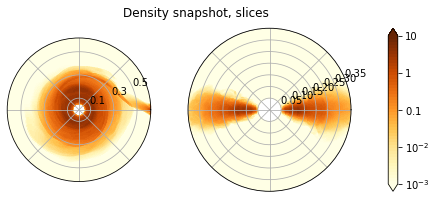

NOTE: the right plot is zoomed in!


/home/ppjanka/anaconda3/envs/globAcc/lib/python3.7/site-packages/ipykernel_launcher.py:101: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


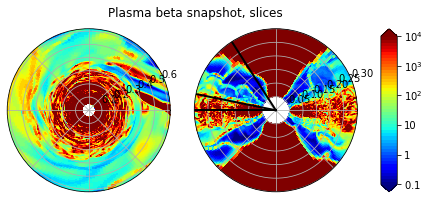

NOTE: the right plot is zoomed in!





KeyboardInterrupt: 

In [5]:
# SLICES

for acc_state in ['None',] + list(accretion_state_times.keys()):
    
    print('\nAccretion "state" %s' % acc_state)
    
    snapshot_path = snapshot_paths[acc_state]
    
    if True:

        # Figure 1: density slices
        fig = plt.figure(figsize=(7.,3.))
        gs = gridspec.GridSpec(1,3, width_ratios=[1.5,2,0.1])
        vars_obj = divars.Default('rho')

        kwargs_common = {'log_scale':True, 'vmin':1.0e-3, 'vmax':10.0, 'levels':50, 'kwargs':{'cmap':'YlOrBr'}}

        ops_obj = diops.EquatorialSlice(vars_obj)
        ops_obj.read(snapshot_path)
        ax, plot = ops_obj.plot(fig, subplot_spec=gs[0,0], **kwargs_common)
        ax.set_ylim(0., None)
        ax.set_yticks([0.1, 0.3, 0.5])
        ax.set_yticklabels([0.1, 0.3, 0.5])
        del ops_obj

        if True:
            ops_obj = diops.PoloidalSlice(vars_obj, x1max=0.35)
            ops_obj.read(snapshot_path)
            ax, plot = ops_obj.plot(fig, subplot_spec=gs[0,1], **kwargs_common)
            ax.set_ylim(0., 0.35)
            del ops_obj
            ops_obj = diops.PoloidalSlice(vars_obj, intersect=np.pi, x1max=0.35)
            ops_obj.read(snapshot_path)
            ax, plot = ops_obj.plot(fig, subplot_spec=gs[0,1], **kwargs_common, 
                                   flip=True)
            ax.set_ylim(0., 0.35)
            del ops_obj
        else:
            ops_obj = diops.PoloidalSlice(vars_obj, x1max=0.4)
            ops_obj.read(snapshot_path)
            ax, plot = ops_obj.plot(fig, subplot_spec=gs[0,1], plot_type='box', **kwargs_common)
            del ops_obj
            ops_obj = diops.PoloidalSlice(vars_obj, intersect=np.pi, x1max=0.4)
            ops_obj.read(snapshot_path)
            ax, plot = ops_obj.plot(fig, subplot_spec=gs[0,1], plot_type='box', rticks=[0.1, 0.2, 0.3], **kwargs_common, flip=True)
            ax.set_xlim(-0.35,0.35)
            ax.set_ylim(-0.175,0.175)
            del ops_obj

        plt.subplot(gs[0,2])
        cbar = fig.colorbar(plot, plt.gca(), orientation='vertical',
                    ticks=[-3,-2,-1,0,1])
        cbar.ax.set_yticklabels(['$10^{-3}$', '$10^{-2}$', '$0.1$', '1', '10'])
        plt.suptitle('Density snapshot, slices')

        if save:
            plt.tight_layout()
            plt.savefig((output_path + '%s/Mach%i_snapshot_rho_%s.png') % (state2title(acc_state), int(mach_no), state2title(acc_state)), format='png', dpi=dpi)
        else:
            plt.show(plot)
        plt.close()

        print("NOTE: the right plot is zoomed in!")
    
    # ---------------------------------------------------------------

    if True:
    
        # Figure 2: plasma beta slices
        fig = plt.figure(figsize=(7.,3.))
        gs = gridspec.GridSpec(1,3, width_ratios=[1,1,0.1])
        vars_obj = divars.PlasmaBeta()

        kwargs_common = {'log_scale':True, 'vmin':1.0e-1, 'vmax':1.0e4, 'levels':50, 'kwargs':{'cmap':'jet'}}

        ops_obj = diops.EquatorialSlice(vars_obj)
        ops_obj.read(snapshot_path)
        ax, plot = ops_obj.plot(fig, subplot_spec=gs[0,0], **kwargs_common)
        ax.set_ylim(0., None)
        #ax.set_yticks([0.1, 0.2, 0.3, 0.4, 0.5])
        #ax.set_yticklabels([0.1, '', 0.3, '', 0.5])
        del ops_obj

        ops_obj = diops.PoloidalSlice(vars_obj, x1max=0.3)
        ops_obj.read(snapshot_path)
        ax, plot = ops_obj.plot(fig, subplot_spec=gs[0,1], **kwargs_common)
        ax.set_ylim(0., 0.3)
        del ops_obj
        ops_obj = diops.PoloidalSlice(vars_obj, intersect=np.pi, x1max=0.3)
        ops_obj.read(snapshot_path)
        ax, plot = ops_obj.plot(fig, subplot_spec=gs[0,1], **kwargs_common, 
                               flip=True)
        ax.set_ylim(0., 0.3)
        del ops_obj

        plt.subplot(gs[0,2])
        cbar = fig.colorbar(plot, plt.gca(), orientation='vertical',
                    ticks=[-1, 0, 1, 2, 3, 4])
        cbar.ax.set_yticklabels(['$0.1$', '1', '10', '$10^{2}$', '$10^{3}$', '$10^{4}$'])

        plt.subplot(gs[0,1])
        plt.axvline(np.pi-0., color='k', ls='-', lw=2)
        plt.axvline(np.pi-(2./mach_no), color='k', ls='-', lw=2)
        plt.axvline(np.pi-(10./mach_no), color='k', ls='-', lw=2)
        
        plt.suptitle('Plasma beta snapshot, slices')

        if save:
            plt.savefig((output_path + '%s/Mach%i_snapshot_beta_%s.png') % (state2title(acc_state), int(mach_no), state2title(acc_state)), format='png', dpi=dpi)
        else:
            plt.show(plot)
        plt.close()

        print("NOTE: the right plot is zoomed in!")

        print("\n\n")
    
    # ---------------------------------------------------------------

    if True:
    
        # Figure 3: Bfield direction
        fig = plt.figure(figsize=(7.,3.))
        gs = gridspec.GridSpec(1,3, width_ratios=[1,1,0.1])
        vars_obj = divars.B2_over_B1()

        kwargs_common = {'log_scale':False, 'vmin':-10., 'vmax':10., 'levels':50, 'kwargs':{'cmap':'RdBu'}}

        ops_obj = diops.EquatorialSlice(vars_obj)
        ops_obj.read(snapshot_path)
        ax, plot = ops_obj.plot(fig, subplot_spec=gs[0,0], **kwargs_common)
        ax.set_ylim(0., None)
        #ax.set_yticks([0.1, 0.2, 0.3, 0.4, 0.5])
        #ax.set_yticklabels([0.1, '', 0.3, '', 0.5])
        del ops_obj

        ops_obj = diops.PoloidalSlice(vars_obj, x1max=0.3, x2min=0.25*np.pi, x2max=0.75*np.pi)
        ops_obj.read(snapshot_path)
        ax, plot = ops_obj.plot(fig, subplot_spec=gs[0,1], **kwargs_common)
        ax.set_ylim(0., 0.3)
        del ops_obj
        ops_obj = diops.PoloidalSlice(vars_obj, intersect=np.pi, x1max=0.3, x2min=0.25*np.pi, x2max=0.75*np.pi)
        ops_obj.read(snapshot_path)
        ax, plot = ops_obj.plot(fig, subplot_spec=gs[0,1], **kwargs_common, 
                               flip=True)
        ax.set_ylim(0., 0.3)
        del ops_obj

        plt.subplot(gs[0,2])
        cbar = fig.colorbar(plot, plt.gca(), orientation='vertical',
                    ticks=[-10,-5,0,5,10])
        #cbar.ax.set_yticklabels(['$0.1$', '1', '10', '$10^{2}$', '$10^{3}$', '$10^{4}$'])
        
        plt.suptitle('$B_{\\Theta}/B_r$ snapshot, slices')

        if save:
            plt.savefig((output_path + '%s/Mach%i_snapshot_B2_over_B1_%s.png') % (state2title(acc_state), int(mach_no), state2title(acc_state)), format='png', dpi=dpi)
        else:
            plt.show(plot)
        plt.close()

        print("NOTE: the right plot is zoomed in!")

        print("\n\n")
    
        # ------------------------------------------------------------
    
        # Figure 3: Bfield direction
        fig = plt.figure(figsize=(7.,3.))
        gs = gridspec.GridSpec(1,3, width_ratios=[1,1,0.1])
        vars_obj = divars.B3_over_B1()

        kwargs_common = {'log_scale':False, 'vmin':-10., 'vmax':10., 'levels':50, 'kwargs':{'cmap':'RdBu'}}

        ops_obj = diops.EquatorialSlice(vars_obj)
        ops_obj.read(snapshot_path)
        ax, plot = ops_obj.plot(fig, subplot_spec=gs[0,0], **kwargs_common)
        ax.set_ylim(0., None)
        #ax.set_yticks([0.1, 0.2, 0.3, 0.4, 0.5])
        #ax.set_yticklabels([0.1, '', 0.3, '', 0.5])
        del ops_obj

        ops_obj = diops.PoloidalSlice(vars_obj, x1max=0.3, x2min=0.25*np.pi, x2max=0.75*np.pi)
        ops_obj.read(snapshot_path)
        ax, plot = ops_obj.plot(fig, subplot_spec=gs[0,1], **kwargs_common)
        ax.set_ylim(0., 0.3)
        del ops_obj
        ops_obj = diops.PoloidalSlice(vars_obj, intersect=np.pi, x1max=0.3, x2min=0.25*np.pi, x2max=0.75*np.pi)
        ops_obj.read(snapshot_path)
        ax, plot = ops_obj.plot(fig, subplot_spec=gs[0,1], **kwargs_common, 
                               flip=True)
        ax.set_ylim(0., 0.3)
        del ops_obj

        plt.subplot(gs[0,2])
        cbar = fig.colorbar(plot, plt.gca(), orientation='vertical',
                    ticks=[-10,-5,0,5,10])
        #cbar.ax.set_yticklabels(['$0.1$', '1', '10', '$10^{2}$', '$10^{3}$', '$10^{4}$'])
        
        plt.suptitle('$B_{\\phi}/B_r$ snapshot, slices')

        if save:
            plt.savefig((output_path + '%s/Mach%i_snapshot_B3_over_B1_%s.png') % (state2title(acc_state), int(mach_no), state2title(acc_state)), format='png', dpi=dpi)
        else:
            plt.show(plot)
        plt.close()

        print("NOTE: the right plot is zoomed in!")

        print("\n\n")
    
        # ------------------------------------------------------------
    
        # Figure 3: Bfield direction
        fig = plt.figure(figsize=(7.,3.))
        gs = gridspec.GridSpec(1,3, width_ratios=[1,1,0.1])
        vars_obj = divars.B2_over_B3()

        kwargs_common = {'log_scale':False, 'vmin':-10., 'vmax':10., 'levels':50, 'kwargs':{'cmap':'RdBu'}}

        ops_obj = diops.EquatorialSlice(vars_obj)
        ops_obj.read(snapshot_path)
        ax, plot = ops_obj.plot(fig, subplot_spec=gs[0,0], **kwargs_common)
        ax.set_ylim(0., None)
        #ax.set_yticks([0.1, 0.2, 0.3, 0.4, 0.5])
        #ax.set_yticklabels([0.1, '', 0.3, '', 0.5])
        del ops_obj

        ops_obj = diops.PoloidalSlice(vars_obj, x1max=0.3, x2min=0.25*np.pi, x2max=0.75*np.pi)
        ops_obj.read(snapshot_path)
        ax, plot = ops_obj.plot(fig, subplot_spec=gs[0,1], **kwargs_common)
        ax.set_ylim(0., 0.3)
        del ops_obj
        ops_obj = diops.PoloidalSlice(vars_obj, intersect=np.pi, x1max=0.3, x2min=0.25*np.pi, x2max=0.75*np.pi)
        ops_obj.read(snapshot_path)
        ax, plot = ops_obj.plot(fig, subplot_spec=gs[0,1], **kwargs_common, 
                               flip=True)
        ax.set_ylim(0., 0.3)
        del ops_obj

        plt.subplot(gs[0,2])
        cbar = fig.colorbar(plot, plt.gca(), orientation='vertical',
                    ticks=[-10,-5,0,5,10])
        #cbar.ax.set_yticklabels(['$0.1$', '1', '10', '$10^{2}$', '$10^{3}$', '$10^{4}$'])
        
        plt.suptitle('$B_{\\Theta}/B_{\\phi}$ snapshot, slices')

        if save:
            plt.savefig((output_path + '%s/Mach%i_snapshot_B2_over_B3_%s.png') % (state2title(acc_state), int(mach_no), state2title(acc_state)), format='png', dpi=dpi)
        else:
            plt.show(plot)
        plt.close()

        print("NOTE: the right plot is zoomed in!")

        print("\n\n")

**Time evolution. Steady-state diagnostics.**

In [ ]:
# Figure 3: Mdot at a set of radii

# load pickled mdot time series calculated by diagnostics_memopt_tseries.py
with open(dataset_pathstem + 'TSeries.pkl', 'rb') as f:
    tseries = pkl.load(f)
    
fig = plt.figure(figsize=(6.5,4.))
i = 0
for radius in reversed(list(tseries['mdot'].keys())):
    # convert to pandas, calculate rolling means
    df = pd.DataFrame.from_dict(tseries['mdot'][radius])
    df[['t_boxcar','val_boxcar']] = df.rolling(frames_to_avg, center=True, win_type='boxcar').mean()
    #df['sd_boxcar'] = df.val.rolling(frames_to_avg, center=True).std()

    plt.plot(df.t_boxcar/(2.*np.pi), df.val_boxcar, label=('r=%.2f' % radius), color=cm.RdBu(radius/0.5),
             #linestyle=linestyles[i][1], #color-blind friendly
             lw=2)
    #plt.fill_between(df.t_boxcar, df.val_boxcar-df.sd_boxcar, df.val_boxcar + df.sd_boxcar, color='grey', alpha=0.2)
    i += 1
plt.axhline(inflow_mdot, color='k', ls='-', lw=2)
#plt.semilogy()

# add boundaries of accretion states
for key in accretion_state_times:
    t1,t2 = accretion_state_times[key]
    plt.axvline(t1, color='k', ls=':', lw=2)
    plt.axvline(t2, color='k', ls=':', lw=2)
    plt.text(0.5*(t1+t2)-0.25, 0.00018, key)

plt.legend(ncol=4, loc='upper left')
plt.ylim(-0.00015, 0.00035)
plt.grid()
#plt.ylim(0., None) #(5.0e-5, None)
plt.xlabel('Time [$P_{orb}$]')
plt.ylabel('$\dot{M}(r)$')
if save:
    plt.savefig((output_path + 'steady/Mach%i_mdotInst.pdf') % int(mach_no), format='pdf')
else:
    plt.show()
plt.close()

In [ ]:
# integrated Mdot from density profiles

from matplotlib import cm
cmap = cm.RdBu

with open(dataset_pathstem + 'Rho_Bmag_profiles1D.pkl', 'rb') as f:
    profiles1D = pkl.load(f)
    
print(profiles1D[1][0])
print(profiles1D[1][1].keys())
print(profiles1D[1][1]['rho'].keys())
print(profiles1D[1][1]['rho']['r'].keys())

times = np.array([x[0] for x in profiles1D])
radii = profiles1D[0][1]['rho']['r']['r']
rho = np.array([x[1]['rho']['r']['val'] for x in profiles1D])

print(times.shape, radii.shape, rho.shape)

frames_to_skip = 100

halftimes = 0.5 * (times[frames_to_skip:] + times[:-frames_to_skip])
dt = times[frames_to_skip:] - times[:-frames_to_skip]
drho = rho[frames_to_skip:] - rho[:-frames_to_skip]
drho_dt = np.array([x/dt for x in drho.transpose()]).transpose()

print(drho_dt.shape)

if False:
    plt.clf()
    for idx in range(len(halftimes)):
        plt.plot(radii, drho_dt[idx], color=cmap(1.0*idx / len(halftimes)))
    plt.show()
    plt.close()

# figure out indices to show
plot_radii = [0.08, 0.12, 0.16, 0.20, 0.5]
ridxs = [max(np.where(radii < radius)[0]) for radius in plot_radii]

plt.clf()
for ridx in ridxs:
    df = pd.DataFrame(np.array([halftimes, drho_dt[:,ridx]]).transpose(), columns=['time', 'drho_dt'])
    df[['t_boxcar','val_boxcar']] = df.rolling(1*frames_to_avg, center=True, win_type='boxcar').mean()
    plt.plot(df.t_boxcar/(2.*np.pi), df.val_boxcar, color=cmap(1.0*radii[ridx] / max(radii)), label=('$r=%.2f$' % radii[ridx]))
    del df
if False:
    # add boundaries of accretion states
    for key in accretion_state_times:
        t1,t2 = accretion_state_times[key]
        plt.axvline(t1, color='k', ls=':', lw=2)
        plt.axvline(t2, color='k', ls=':', lw=2)
        plt.text(0.5*(t1+t2)-0.25, 0.0004, key)
plt.legend(ncol=3)
plt.xlabel('Time [$P_{\\rm orb}$]')
plt.ylabel('$\\frac{\\partial\\rho}{\\partial t}(r)$')
plt.show()
plt.close()

plt.clf()
for ridx in ridxs:
    plt.plot(times/(2.*np.pi), rho[:,ridx], color=cmap(1.0*radii[ridx] / max(radii)), label=('$r=%.2f$' % radii[ridx]))
# add boundaries of accretion states
for key in accretion_state_times:
    t1,t2 = accretion_state_times[key]
    plt.axvline(t1, color='k', ls=':', lw=2)
    plt.axvline(t2, color='k', ls=':', lw=2)
    plt.text(0.5*(t1+t2)-0.25, 0.0004, key)
plt.legend(ncol=1)
plt.xlabel('Time [$P_{\\rm orb}$]')
plt.ylabel('$\\rho(r)$')

if save:
    plt.savefig((output_path + 'steady/Mach%i_Rho_of_t.pdf') % (int(mach_no),))
else:
    plt.show()
plt.close()

**Profiles of various quantities binned over Porb or so (cf. Wendy 2, fig. 2)**

In [ ]:
profiles1D_avg = {}
profiles1D_avg_npoints = {}

for datatype in ['Rho_Bmag', 'alpha_RvsM', 'Mdot_beta']:

    with open(dataset_pathstem + datatype + '_profiles1D.pkl', 'rb') as f:
        profiles1D = pkl.load(f)
    failed_idx = np.where(np.array(list(map(lambda x : x == None, profiles1D))))[0]
    if len(failed_idx) > 0:
        profiles1D = profiles1D[:(min(failed_idx))]

    # average profiles per orbit
    avglen = 2.*np.pi
    tmax = max(list(map(lambda x : x[0], profiles1D)))
    tmax_orbits = int(tmax/avglen)+1
    mesh = {}
    anyquantity = list(profiles1D[0][1].keys())[0]
    mesh['theta'] = np.array(profiles1D[0][1][anyquantity]['theta']['theta'])
    mesh['r'] = np.array(profiles1D[0][1][anyquantity]['r']['r'])
    for record in profiles1D:
        time = record[0]
        norbit = int(time/avglen)
        for quantity in record[1].keys():
            # initialize if needed
            if quantity not in profiles1D_avg.keys():
                profiles1D_avg[quantity] = {}
                profiles1D_avg_npoints[quantity] = {}
                for proftype in ['theta', 'r']:
                    profiles1D_avg[quantity][proftype] = np.zeros((tmax_orbits, len(mesh[proftype])))
                    profiles1D_avg_npoints[quantity][proftype] = np.zeros(tmax_orbits)
            # assign profile to orbit
            for proftype in ['theta', 'r']:
                if (np.array(record[1][quantity][proftype][proftype]) == mesh[proftype]).all():
                    profiles1D_avg[quantity][proftype][norbit] += np.array(record[1][quantity][proftype]['val'])
                    profiles1D_avg_npoints[quantity][proftype][norbit] += 1
                else:
                    print('%s profile for %s at t=%f ignored, mesh doesnt match.' % (proftype, quantity, time))
    del profiles1D

# average over orbit
for quantity in profiles1D_avg.keys():
    for proftype in ['theta', 'r']:
        if len(profiles1D_avg[quantity][proftype]) < tmax_orbits:
            tmax_orbits = len(profiles1D_avg[quantity][proftype])
        for time in range(len(profiles1D_avg[quantity][proftype])):
            profiles1D_avg[quantity][proftype][time] /= profiles1D_avg_npoints[quantity][proftype][time]

# clean up
del profiles1D_avg_npoints

In [ ]:
rmax = 0.25
rmask = np.where(mesh['r'] < rmax)[0]
thetamax = 4./mach_no
thetamask = np.where(np.abs(0.5*np.pi-mesh['theta']) < thetamax)[0]

fig = plt.figure(figsize = (6,14))
gs = gridspec.GridSpec(8,2, height_ratios=(1,1,1,1,1,1,0.05, 0.1), hspace=0.3)
for time in range(tmax_orbits):
    kwargs = {'color':cm.RdBu(1.*time/tmax_orbits)}
    # surface density (TODO)
    plt.subplot(gs[0,0])
    plt.plot(mesh['r'][rmask], profiles1D_avg['rho']['r'][time][rmask], **kwargs)
    plt.semilogy(); plt.grid()
    plt.ylabel('Density [sim.u.]')
    plt.subplot(gs[0,1])
    plt.plot(profiles1D_avg['rho']['theta'][time][thetamask], mesh['theta'][thetamask], **kwargs)
    plt.semilogx(); plt.grid()
    # magnetic field value
    plt.subplot(gs[1,0])
    plt.plot(mesh['r'][rmask], profiles1D_avg['Bmag']['r'][time][rmask], **kwargs)
    plt.semilogy(); plt.grid()
    plt.ylabel('Magnetic field [sim.u.]')
    plt.ylim(0.8e-2, 1.1e-1)
    plt.subplot(gs[1,1])
    plt.xlim(0.8e-2, 1.1e-1)
    plt.plot(profiles1D_avg['Bmag']['theta'][time][thetamask], mesh['theta'][thetamask], **kwargs)
    plt.semilogx(); plt.grid()
    # beta
    plt.subplot(gs[2,0])
    plt.plot(mesh['r'][rmask], profiles1D_avg['PlasmaBeta']['r'][time][rmask], **kwargs)
    plt.grid()
    plt.ylabel('Plasma $\\beta$')
    plt.ylim(2., 300.); plt.semilogy()
    plt.subplot(gs[2,1])
    plt.xlim(2., 300.); plt.semilogx()
    plt.plot(profiles1D_avg['PlasmaBeta']['theta'][time][thetamask], mesh['theta'][thetamask], **kwargs)
    plt.grid()
    # alpha_R
    plt.subplot(gs[3,0])
    plt.plot(mesh['r'][rmask], profiles1D_avg['$\\alpha$_Reynolds']['r'][time][rmask], **kwargs)
    plt.grid()
    plt.ylabel('$\\alpha_{\\rm Reynolds}$')
    plt.ylim(-0.03, 0.07)
    plt.yticks([-0.03, 0., 0.03, 0.06])
    plt.subplot(gs[3,1])
    plt.xlim(-0.02, 0.1)
    plt.plot(profiles1D_avg['$\\alpha$_Reynolds']['theta'][time][thetamask], mesh['theta'][thetamask], **kwargs)
    plt.grid()
    # alpha_M
    plt.subplot(gs[4,0])
    plt.plot(mesh['r'][rmask], profiles1D_avg['$\\alpha$_Maxwell']['r'][time][rmask], **kwargs)
    plt.grid()
    plt.ylabel('$\\alpha_{\\rm Maxwell}$')
    plt.ylim(0., 0.275)
    plt.subplot(gs[4,1])
    plt.xlim(0., 0.275)
    plt.plot(profiles1D_avg['$\\alpha$_Maxwell']['theta'][time][thetamask], mesh['theta'][thetamask], **kwargs)
    plt.grid()
    # Mdot
    plt.subplot(gs[5,0])
    plt.plot(mesh['r'][rmask], profiles1D_avg['Mdot']['r'][time][rmask]*1.0e4, **kwargs)
    plt.grid()
    plt.ylabel('$\dot{M}$ [$10^{-4}$ sim.u.]')
    plt.ylim(0., 3.)
    plt.subplot(gs[5,1])
    plt.plot(profiles1D_avg['Mdot']['theta'][time][thetamask]*1.0e4, mesh['theta'][thetamask], **kwargs)
    plt.grid()
plt.subplot(gs[-3,0])
plt.xlabel('$r$ [sim.u.]')
plt.subplot(gs[-1,:])
mappable = cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=tmax_orbits), cmap=cm.get_cmap('RdBu', tmax_orbits))
mappable.set_array(range(tmax_orbits))
plt.colorbar(mappable, cax=plt.gca(), orientation='horizontal')
plt.xlabel('Time [$P_{\\rm orb}$]')
for row in range(6):
    plt.subplot(gs[row, 1])
    plt.yticks([0.5*np.pi-4./mach_no, 0.5*np.pi-2./mach_no, 0.5*np.pi, 0.5*np.pi+2./mach_no, 0.5*np.pi+4./mach_no, ])
    ax = plt.gca()
    ax.set_yticklabels(['4/M', '2/M', '0', '-2/M', '-4/M'])
    ax.yaxis.tick_right()
    plt.ylabel('$\pi/2-\Theta$')
    ax.yaxis.set_label_position("right")
if save:
    plt.subplots_adjust(left=0.14, right=0.89, top=0.99, bottom=0.04)
    plt.savefig((output_path + 'evolution_1Dprofiles_M%i.pdf') % mach_no, format='pdf')
else:
    plt.show(plot)
plt.close()

In [ ]:
# Figure 5: Actual Mdot with power spectrum

# load pickled mdot time series calculated by diagnostics_memopt_tseries.py
with open(dataset_pathstem + 'TSeries.pkl', 'rb') as f:
    tseries = pkl.load(f)
    
for acc_state in ['None',] + list(accretion_state_times.keys()):
    
    print(state2title(acc_state))
    
    for radius in tseries['mdot'].keys():

        print("$r=%.2f$" % radius)

        df = pd.DataFrame.from_dict(tseries['mdot'][radius])
        df = df.query('t > %.5f' % tstart_steady)
        if acc_state != 'None':
            df = df.query('t > %.5f' % (accretion_state_times[acc_state][0]*Porb,))
            df = df.query('t < %.5f' % (accretion_state_times[acc_state][1]*Porb,))
        df = df.reset_index()

        tstep = df.t.iloc[1] - df.t.iloc[0]
        val_pspec = np.abs(np.fft.fft(df['val']))**2
        freq_pspec = np.fft.fftfreq(df.shape[0], tstep)
        idx = np.argsort(freq_pspec)
        val_pspec /= np.mean(df.val)**2

        fig = plt.figure(figsize=(7.,3.))
        gs = gridspec.GridSpec(1,2)

        plt.subplot(gs[0,0])
        plt.plot(df.t/(2.*np.pi), 1.0e4*df.val, color='red')
        plt.scatter(df.t/(2.*np.pi), 1.0e4*df.val, color='red')
        plt.grid()
        plt.xlabel('Time [$P_{orb}$]')
        plt.ylabel('$10^4\\times\dot{M}(r_{in})$ [sim.u.]')

        plt.subplot(gs[0,1])
        plt.plot(freq_pspec[idx], val_pspec[idx], color='k')
        plt.grid()
        plt.xlabel('Frequency [$1/P_{orb}$]')
        plt.ylabel('Power [(rms/mean)$^2$]')
        plt.xlim(freq_pspec[1], None)
        plt.semilogy()
        #plt.semilogx()
        plt.suptitle('Accretion rate at $r=%.2f$' % radius)

        if save:
            plt.savefig((output_path + '%s/Mach%i_PDF_r%02i.pdf') % (state2title(acc_state), int(mach_no),int(100.*radius)))
        else:
            plt.show()
    plt.close()

---------------------------------------------------------
**Steady-state and accretion-state -averaged plots**

In [ ]:
# 2D alpha Reynolds profile

for acc_state in list(accretion_state_times.keys()) + [None,]:
    
    print(state2title(acc_state))

    # load and reuse
    with open(dataset_pathstem + ('%s_AlphaReynolds.pkl' % state2title(acc_state)), 'rb') as f:
        ops_obj_eq, ops_obj_pol = pkl.load(f)

    # plot
    fig = plt.figure(figsize=(7.,3.))
    gs = gridspec.GridSpec(1,3, wspace=0., width_ratios=(1,1,0.05))
    kwargs = {'vmin':-0.05, 'vmax':0.05, 'log_scale':False, 'levels':50, 'kwargs':{'cmap':'RdBu'}}
    ax, plot = ops_obj_eq.plot(fig, subplot_spec=gs[0,0], **kwargs)
    ax.set_ylim(0., 0.6)
    ax, plot = ops_obj_pol.plot(fig, subplot_spec=gs[0,1], **kwargs)
    ax.set_xlim(-0.5*np.pi, 0.5*np.pi)
    ax.set_ylim(0., 0.6)
    plt.subplot(gs[0,2])
    cbar = fig.colorbar(plot, cax=plt.gca(), ticks=[-0.04, -0.02, 0, 0.02, 0.04])
    plt.suptitle('Reynolds $\\alpha$ parameter, time-avg, $|\\frac{\\pi}{2}-\\Theta|<0.5H/R$ (L), $\\phi$ (R) -avg')
    
    if save:
        plt.savefig((output_path + '%s/Mach%i_avg_alphaR_%s.png') % (state2title(acc_state), int(mach_no), state2title(acc_state)), fomat='png', dpi=dpi)
    else:
        plt.show()
    plt.close()
    
    del ops_obj_eq, ops_obj_pol

In [ ]:
# 2D alpha Maxwell profile

for acc_state in list(accretion_state_times.keys()) + [None,]:
    
    print(state2title(acc_state))

    # load and reuse
    with open(dataset_pathstem + ('%s_AlphaMaxwell.pkl' % state2title(acc_state)), 'rb') as f:
        ops_obj_eq, ops_obj_pol = pkl.load(f)

    # plot
    fig = plt.figure(figsize=(7.,3.))
    gs = gridspec.GridSpec(1,3, wspace=0., width_ratios=(1,1,0.05))
    kwargs = {'vmin':-0.01, 'vmax':0.01, 'log_scale':False, 'levels':50, 'kwargs':{'cmap':'RdBu'}}
    ax, plot = ops_obj_eq.plot(fig, subplot_spec=gs[0,0], **kwargs)
    ax.set_ylim(0., 0.6)
    ax, plot = ops_obj_pol.plot(fig, subplot_spec=gs[0,1], **kwargs)
    ax.set_xlim(-0.5*np.pi, 0.5*np.pi)
    ax.set_ylim(0., 0.6)
    plt.subplot(gs[0,2])
    cbar = fig.colorbar(plot, cax=plt.gca(), ticks=[-0.01, -0.005, 0, 0.005, 0.01])
    plt.suptitle('Maxwell $\\alpha$ parameter, time-avg, $|\\frac{\\pi}{2}-\\Theta|<0.5H/R$ (L), $\\phi$ (R) -avg')
    
    if save:
        plt.savefig((output_path + '%s/Mach%i_avg_alphaM_%s.png') % (state2title(acc_state), int(mach_no), state2title(acc_state)), format='png', dpi=dpi)
    else:
        plt.show()
    plt.close()
    
    del ops_obj_eq, ops_obj_pol

In [ ]:
# 2D rho profile

for acc_state in list(accretion_state_times.keys()) + [None,]:
    
    print(state2title(acc_state))

    # load and reuse
    with open(dataset_pathstem + ('%s_rho.pkl' % state2title(acc_state)), 'rb') as f:
        ops_obj_eq, ops_obj_pol = pkl.load(f)

    # plot
    fig = plt.figure(figsize=(7.,3.))
    gs = gridspec.GridSpec(1,3, wspace=0., width_ratios=(1,1,0.05))
    kwargs = {'log_scale':True, 'vmin':0.001, 'vmax':3.0, 'levels':50, 'kwargs':{'cmap':'YlOrBr'}}
    ax, plot = ops_obj_eq.plot(fig, subplot_spec=gs[0,0], **kwargs)
    ax.set_ylim(0., 0.6)
    ax, plot = ops_obj_pol.plot(fig, subplot_spec=gs[0,1], **kwargs)
    ax.set_xlim(-0.5*np.pi, 0.5*np.pi)
    ax.set_ylim(0., 0.6)
    plt.subplot(gs[0,2])
    cbar = fig.colorbar(plot, cax=plt.gca(),
                ticks=[-3,-2,-1,0,1])
    cbar.ax.set_yticklabels(['$10^{-3}$', '$10^{-2}$', '$0.1$', '1', '10'])
    plt.suptitle('Log$_{10}$ Density [sim.u.], time-avg, $|\\frac{\\pi}{2}-\\Theta|<0.5H/R$ (L), $\\phi$ (R) -avg')
    
    if save:
        plt.savefig((output_path + '%s/Mach%i_avg_rho_%s.png') % (state2title(acc_state), int(mach_no), state2title(acc_state)), format='png', dpi=dpi)
    else:
        plt.show()
    plt.close()
    
    del ops_obj_eq, ops_obj_pol

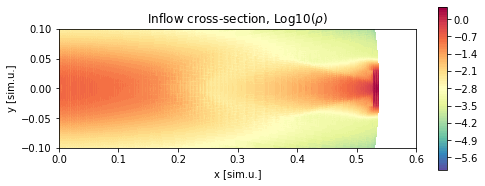

In [14]:
# inflow cross-section in edge-on view

# load and reuse
with open(dataset_pathstem + 'steady_rho3D.pkl', 'rb') as f:
    data = pkl.load(f)
data = data.data
r, theta, phi, val = data['r'], data['theta'], data['phi'], data['val']
del data
rm, tm, pm = np.meshgrid(r, theta, phi, indexing='ij')

# flatten all
rm = rm.flatten()
tm = tm.flatten()
pm = pm.flatten()
val = val.flatten()

# rotate to align the system with the inflow
pm = pm + 30.*np.pi/180.

# transform to cartesian coordinates
xm = rm * np.sin(tm) * np.cos(pm)
ym = rm * np.sin(tm) * np.sin(pm)
zm = rm * np.cos(tm)

# move to the inflow location
ym -= np.sin(30.*np.pi/180.) * 0.62

# select the plane
mask = np.where(np.abs(ym) < 0.01)[0]
xm = xm[mask]
ym = ym[mask]
zm = zm[mask]
val = val[mask]

# plot
plt.figure(figsize=(8,3))
plt.tricontourf(xm, zm, np.log10(val), 64, cmap='Spectral_r')
plt.colorbar()
#plt.scatter(xm, zm, color='k', s=0.5)

plt.xlim(0., 0.6)
plt.ylim(-0.1, 0.1)
plt.gca().set_aspect(1.)
plt.title('Inflow cross-section, Log10($\\rho$)')
plt.xlabel('x [sim.u.]')
plt.ylabel('y [sim.u.]')

if save:
    plt.savefig('M%i_infl_rev1.png' % mach_no, format='png')
else:
    plt.show()
plt.close()

In [ ]:
# 2D vr profile

for acc_state in list(accretion_state_times.keys()) + [None,]:
    
    print(state2title(acc_state))

    # load and reuse
    with open(dataset_pathstem + ('%s_vr.pkl' % state2title(acc_state)), 'rb') as f:
        ops_obj_eq, ops_obj_pol = pkl.load(f)

    # plot
    fig = plt.figure(figsize=(7.,3.))
    gs = gridspec.GridSpec(1,3, wspace=0., width_ratios=(1,1,0.05))
    kwargs = {'log_scale':False, 'vmin':-0.1, 'vmax':0.1, 'levels':50, 'kwargs':{'cmap':'RdBu'}}
    ax, plot = ops_obj_eq.plot(fig, subplot_spec=gs[0,0], **kwargs)
    ax.set_ylim(0., 0.6)
    ax, plot = ops_obj_pol.plot(fig, subplot_spec=gs[0,1], **kwargs)
    ax.set_xlim(-0.5*np.pi, 0.5*np.pi)
    ax.set_ylim(0., 0.6)
    plt.subplot(gs[0,2])
    cbar = fig.colorbar(plot, cax=plt.gca(),
                ticks=[-0.1, 0., 0.1])
    #cbar.ax.set_yticklabels(['$10^{-3}$', '$10^{-2}$', '$0.1$', '1', '10'])
    plt.suptitle('Radial velocity [sim.u.], time-avg, $|\\frac{\\pi}{2}-\\Theta|<0.5H/R$ (L), $\\phi$ (R) -avg')
    
    if save:
        plt.savefig((output_path + '%s/Mach%i_avg_vr_%s.png') % (state2title(acc_state), int(mach_no), state2title(acc_state)), format='png', dpi=dpi)
    else:
        plt.show()
    plt.close()
    
    del ops_obj_eq, ops_obj_pol

In [ ]:
# 2D PlasmaBeta profile

for acc_state in [None,] + list(accretion_state_times.keys()):
    
    print(state2title(acc_state))

    # load and reuse
    with open(dataset_pathstem + ('%s_PlasmaBeta.pkl' % state2title(acc_state)), 'rb') as f:
        ops_obj_eq, ops_obj_pol = pkl.load(f)

    # plot
    fig = plt.figure(figsize=(7.,3.))
    gs = gridspec.GridSpec(1,3, wspace=0., width_ratios=(1,1,0.05))
    kwargs = {'log_scale':True, 'vmin':1.0e-1, 'vmax':1.0e4, 'levels':50, 'kwargs':{'cmap':'jet'}}
    ax, plot = ops_obj_eq.plot(fig, subplot_spec=gs[0,0], **kwargs)
    ax.set_ylim(0., 0.6)
    ax, plot = ops_obj_pol.plot(fig, subplot_spec=gs[0,1], **kwargs)
    ax.set_xlim(-0.5*np.pi, 0.5*np.pi)
    ax.set_ylim(0., 0.6)
    plt.subplot(gs[0,2])
    cbar = fig.colorbar(plot, cax=plt.gca(),
                ticks=[-1, 0, 1, 2, 3, 4])
    cbar.ax.set_yticklabels(['$0.1$', '1', '10', '$10^{2}$', '$10^{3}$', '$10^{4}$'])
    plt.suptitle('Log$_{10}$ Plasma $\\beta$, time-avg, $|\\frac{\\pi}{2}-\\Theta|<0.5H/R$ (L), $\\phi$ (R) -avg')

    plt.subplot(gs[0,1])
    plt.axvline(0., color='k', ls='-', lw=2)
    plt.axvline((2./mach_no), color='k', ls='-', lw=2)
    plt.axvline((10./mach_no), color='k', ls='-', lw=2)
    
    if save:
        plt.savefig((output_path + '%s/Mach%i_avg_beta_%s.png') % (state2title(acc_state), int(mach_no), state2title(acc_state)), format='png', dpi=dpi)
    else:
        plt.show()
    plt.close()
    
    del ops_obj_eq, ops_obj_pol

In [ ]:
# 2D Bfield geometry profile

for acc_state in list(accretion_state_times.keys()) + [None,]:
    
    print(state2title(acc_state))

    # load and reuse
    with open(dataset_pathstem + ('%s_B2_over_B1.pkl' % state2title(acc_state)), 'rb') as f:
        ops_obj_eq, ops_obj_pol = pkl.load(f)

    # plot
    fig = plt.figure(figsize=(7.,3.))
    gs = gridspec.GridSpec(1,3, wspace=0., width_ratios=(1,1,0.05))
    kwargs = {'log_scale':False, 'vmin':-10., 'vmax':10., 'levels':50, 'kwargs':{'cmap':'RdBu'}}
    ax, plot = ops_obj_eq.plot(fig, subplot_spec=gs[0,0], **kwargs)
    ax.set_ylim(0., 0.6)
    ax, plot = ops_obj_pol.plot(fig, subplot_spec=gs[0,1], **kwargs)
    ax.set_xlim(-0.5*np.pi, 0.5*np.pi)
    ax.set_ylim(0., 0.6)
    plt.subplot(gs[0,2])
    cbar = fig.colorbar(plot, cax=plt.gca(),
                ticks=[-10, -5, 0, 5, 10])
    #cbar.ax.set_yticklabels(['$0.1$', '1', '10', '$10^{2}$', '$10^{3}$', '$10^{4}$'])
    plt.suptitle('$B_{\\Theta}/B_r$, time-avg, $|\\frac{\\pi}{2}-\\Theta|<0.5H/R$ (L), $\\phi$ (R) -avg')
    
    if save:
        plt.savefig((output_path + '%s/Mach%i_avg_B2_over_B1_%s.png') % (state2title(acc_state), int(mach_no), state2title(acc_state)), format='png', dpi=dpi)
    else:
        plt.show()
    plt.close()
    
    del ops_obj_eq, ops_obj_pol
    
    # ------------------------------------------------------------

    # load and reuse
    with open(dataset_pathstem + ('%s_B3_over_B1.pkl' % state2title(acc_state)), 'rb') as f:
        ops_obj_eq, ops_obj_pol = pkl.load(f)

    # plot
    fig = plt.figure(figsize=(7.,3.))
    gs = gridspec.GridSpec(1,3, wspace=0., width_ratios=(1,1,0.05))
    kwargs = {'log_scale':False, 'vmin':-10., 'vmax':10., 'levels':50, 'kwargs':{'cmap':'RdBu'}}
    ax, plot = ops_obj_eq.plot(fig, subplot_spec=gs[0,0], **kwargs)
    ax.set_ylim(0., 0.6)
    ax, plot = ops_obj_pol.plot(fig, subplot_spec=gs[0,1], **kwargs)
    ax.set_xlim(-0.5*np.pi, 0.5*np.pi)
    ax.set_ylim(0., 0.6)
    plt.subplot(gs[0,2])
    cbar = fig.colorbar(plot, cax=plt.gca(),
                ticks=[-10, -5, 0, 5, 10])
    #cbar.ax.set_yticklabels(['$0.1$', '1', '10', '$10^{2}$', '$10^{3}$', '$10^{4}$'])
    plt.suptitle('$B_{\\phi}/B_r$, time-avg, $|\\frac{\\pi}{2}-\\Theta|<0.5H/R$ (L), $\\phi$ (R) -avg')
    
    if save:
        plt.savefig((output_path + '%s/Mach%i_avg_B3_over_B1_%s.png') % (state2title(acc_state), int(mach_no), state2title(acc_state)), format='png', dpi=dpi)
    else:
        plt.show()
    plt.close()
    
    del ops_obj_eq, ops_obj_pol
    
    # ------------------------------------------------------------

    # load and reuse
    with open(dataset_pathstem + ('%s_B2_over_B3.pkl' % state2title(acc_state)), 'rb') as f:
        ops_obj_eq, ops_obj_pol = pkl.load(f)

    # plot
    fig = plt.figure(figsize=(7.,3.))
    gs = gridspec.GridSpec(1,3, wspace=0., width_ratios=(1,1,0.05))
    kwargs = {'log_scale':False, 'vmin':-10., 'vmax':10., 'levels':50, 'kwargs':{'cmap':'RdBu'}}
    ax, plot = ops_obj_eq.plot(fig, subplot_spec=gs[0,0], **kwargs)
    ax.set_ylim(0., 0.6)
    ax, plot = ops_obj_pol.plot(fig, subplot_spec=gs[0,1], **kwargs)
    ax.set_xlim(-0.5*np.pi, 0.5*np.pi)
    ax.set_ylim(0., 0.6)
    plt.subplot(gs[0,2])
    cbar = fig.colorbar(plot, cax=plt.gca(),
                ticks=[-10, -5, 0, 5, 10])
    #cbar.ax.set_yticklabels(['$0.1$', '1', '10', '$10^{2}$', '$10^{3}$', '$10^{4}$'])
    plt.suptitle('$B_{\\Theta}/B_{\\phi}$, time-avg, $|\\frac{\\pi}{2}-\\Theta|<0.5H/R$ (L), $\\phi$ (R) -avg')
    
    if save:
        plt.savefig((output_path + '%s/Mach%i_avg_B2_over_B3_%s.png') % (state2title(acc_state), int(mach_no), state2title(acc_state)), format='png', dpi=dpi)
    else:
        plt.show()
    plt.close()
    
    del ops_obj_eq, ops_obj_pol

In [ ]:
# 1D radial profiles

for acc_state in list(accretion_state_times.keys()) + [None,]:
    
    print(state2title(acc_state))

    plt.rcParams.update({'font.size': 10})

    # load and reuse
    with open(dataset_pathstem + ('%s_radial.pkl' % state2title(acc_state)), 'rb') as f:
        ops_objs = pkl.load(f)

    ops_labels = {0:'$|\pi/2-\\theta|\in[0,2H/R]$', 1:'$|\pi/2-\\theta|\in[2H/R, 10H/R]$'}
    ops_lss = {0:'-', 1:'--', 2:':'}
    mdot_total = []

    # plot
    fig = plt.figure(figsize=(7,7))
    gs = gridspec.GridSpec(2,2)

    for idx in range(len(ops_objs.keys())-1):

        ax, plot = ops_objs[idx]['rho'].plot(fig, subplot_spec=gs[0,0], log_scale=False, title='Density [sim.u.]', vmin=1.0e-3, vmax=None, kwargs={'label':ops_labels[idx], 'ls':ops_lss[idx], 'color':'k'})
        plt.semilogy()
        ax.set_xlabel('')

        kwargs = {'color':'k', 'ls':ops_lss[idx]}
        if idx == 0:
            kwargs.update({'label':'Total'})
        ax, plot = ops_objs[idx]['Ptot'].plot(fig, subplot_spec=gs[0,1], kwargs=kwargs, title='Pressure [sim.u.]', log_scale=False, vmin=1.0e-4, vmax=None)
        plt.semilogy()
        kwargs = {'color':'C3', 'ls':ops_lss[idx]}
        if idx == 0:
            kwargs.update({'label':'$P_{mag}$'})
        ax, plot = ops_objs[idx]['Pmag'].plot(fig, subplot_spec=gs[0,1], kwargs=kwargs)
        kwargs = {'color':'C0', 'ls':ops_lss[idx]}
        if idx == 0:
            kwargs.update({'label':'$P_{gas}$'})
        ax, plot = ops_objs[idx]['press'].plot(fig, subplot_spec=gs[0,1], kwargs=kwargs)
        ax.set_xlabel('')
        ax.yaxis.tick_right()

        #kwargs = {'color':'k', 'ls':ops_lss[idx]}
        #if idx == 0:
        #    kwargs.update({'label':'Total'})
        #ax, plot = ops_objs[idx]['alpha_tot'].plot(fig, subplot_spec=gs[1,0], kwargs=kwargs, 
        #        title='$\\alpha$-parameter', vmin=-0.1, vmax=0.4)
        kwargs = {'color':'C3', 'ls':ops_lss[idx]}
        if idx == 0:
            kwargs.update({'label':'$\\alpha_M$'})
        ax, plot = ops_objs[idx]['alpha_Maxwell'].plot(fig, subplot_spec=gs[1,0], kwargs=kwargs, title='$\\alpha$-parameter', vmin=0.0, vmax=0.03)
        kwargs = {'color':'C0', 'ls':ops_lss[idx]}
        if idx == 0:
            kwargs.update({'label':'$\\alpha_R$'})
        ax, plot = ops_objs[idx]['alpha_Reynolds'].plot(fig, subplot_spec=gs[1,0], kwargs=kwargs)
        ax.axhline(0., color='k', ls='-', linewidth=2)

        kwargs = {'color':'C5', 'ls':ops_lss[idx]}
        ax, plot = ops_objs[idx]['Mdot'].plot(fig, subplot_spec=gs[1,1], title='$\dot{M}$ [sim.u.]', kwargs=kwargs, vmin=None, vmax=0.00008)

        if len(mdot_total) == 0:
            mdot_total = ops_objs[idx]['Mdot'].val
        else:
            mdot_total += ops_objs[idx]['Mdot'].val

    plt.subplot(gs[1,1])
    plt.plot(ops_objs[0]['Mdot'].r, mdot_total, color='k', ls='-', label='$Total$')
    plt.axhline(0., color='k', ls='-', linewidth=2)
    ax.yaxis.tick_right()

    for subplot_spec in [gs[0,0], gs[0,1], gs[1,0], gs[1,1]]:
        plt.subplot(subplot_spec)
        plt.legend()
        plt.grid(True)
        plt.xlim(0.06, 0.25)
        
    plt.subplot(gs[0,0])
    plt.ylim(1.0e-4, 1.0e-1)
    plt.subplot(gs[0,1])
    plt.ylim(1.0e-5, 5.0e-1)
    plt.subplot(gs[1,0])
    plt.gca().set_yscale('log')
    plt.ylim(1.0e-4, 0.1)

    plt.suptitle('Radial profiles, time-avg, disk-avg')

    if save:
        plt.tight_layout()
        plt.savefig((output_path + '%s/Mach%i_radial_%s.pdf') % (state2title(acc_state), int(mach_no), state2title(acc_state)))
    else:
        plt.show()
    plt.close()

Note: alpha profiles don't seem to be very useful, they are completely dominated by low pressure zones at the disk surface...

In [ ]:
# 1D vertical profiles

for acc_state in [None,] + list(accretion_state_times.keys()):
    
    print(state2title(acc_state))

    # load and reuse
    with open(dataset_pathstem + ('%s_vertical.pkl' % state2title(acc_state)), 'rb') as f:
        ops_objs_vertical = pkl.load(f)

    # plot
    lss = {'slice':':', 'avg':'-'}

    fig = plt.figure(figsize=(7,11))
    gs = gridspec.GridSpec(6,2)

    # Density
    for t in ['slice', 'avg']:
        ax, plot = ops_objs_vertical['rho'][t].plot(fig, subplot_spec=gs[0,0], log_scale=True, cmap=cm.RdBu, kwargs={'ls':lss[t]})
    plt.grid(True)
    plt.title('Density [sim.u.]')

    # Total pressure
    for t in ['slice', 'avg']:
        ax, plot = ops_objs_vertical['Ptot'][t].plot(fig, subplot_spec=gs[0,1], log_scale=True, cmap=cm.RdBu, kwargs={'ls':lss[t]})
    plt.grid(True)
    plt.title('Total pressure [sim.u.]')

    # Gas pressure
    for t in ['slice', 'avg']:
        ax, plot = ops_objs_vertical['press'][t].plot(fig, subplot_spec=gs[1,0], log_scale=True, cmap=cm.RdBu, kwargs={'ls':lss[t]})
    plt.grid(True)
    plt.title('Gas pressure [sim.u.]')

    # Magnetic pressure
    for t in ['slice', 'avg']:
        ax, plot = ops_objs_vertical['Pmag'][t].plot(fig, subplot_spec=gs[1,1], log_scale=True, cmap=cm.RdBu, kwargs={'ls':lss[t]})
    plt.grid(True)
    plt.title('Magnetic pressure [sim.u.]')

    # d mdot / dz
    for t in ['avg',]:
        # divide by dz
        for rr in ops_objs_vertical['MdotVert'][t].radii:
            z = ops_objs_vertical['MdotVert'][t].z_over_r * rr
            z = np.insert(z, 0, z[0]) # for the right dims
            dz = np.array(z[1:] - z[:-1])
            ops_objs_vertical['MdotVert'][t].val[rr] = np.squeeze(ops_objs_vertical['MdotVert'][t].val[rr]) / dz

        #plot
        ax, plot = ops_objs_vertical['MdotVert'][t].plot(fig, subplot_spec=gs[2,0], log_scale=False, cmap=cm.RdBu, kwargs={'ls':lss[t]})
    plt.grid(True)
    plt.title('$d\dot{M}/dz$ [sim.u.]')

    # plasma beta
    for t in ['avg',]:
        radii = ops_objs_vertical['press'][t].radii
        rmin, rmax = min(radii), max(radii)
        for r in radii:
            Pgas = ops_objs_vertical['press'][t].val[r]
            Pmag = ops_objs_vertical['Pmag'][t].val[r]
            plt.subplot(gs[2,1])
            plt.plot(ops_objs_vertical['press'][t].z_over_r ,Pgas/Pmag, color=cm.RdBu((r-rmin)/(rmax-rmin)), label=('$r=%.2f$' % r))
            plt.grid(True)
            plt.title('$\\beta$')
            plt.semilogy()

    # alpha_tot
    for t in ['avg',]:
        ax, plot = ops_objs_vertical['alpha_tot'][t].plot(fig, subplot_spec=gs[3,1], log_scale=False, cmap=cm.RdBu, kwargs={'ls':lss[t]})
    plt.grid(True)
    plt.title('Total $\\alpha$-parameter [sim.u.]')

    # alpha_R
    for t in ['avg',]:
        ax, plot = ops_objs_vertical['alpha_Reynolds'][t].plot(fig, subplot_spec=gs[4,0], log_scale=True, cmap=cm.RdBu, kwargs={'ls':lss[t]})
    plt.grid(True)
    plt.title('Reynolds $\\alpha$-parameter [sim.u.]')

    # alpha_M
    for t in ['avg',]:
        ax, plot = ops_objs_vertical['alpha_Maxwell'][t].plot(fig, subplot_spec=gs[4,1], log_scale=True, cmap=cm.RdBu, kwargs={'ls':lss[t]})
    plt.grid(True)
    plt.title('Maxwell $\\alpha$-parameter [sim.u.]')

    # stress_R
    for t in ['avg',]:
        ax, plot = ops_objs_vertical['T_Reynolds'][t].plot(fig, subplot_spec=gs[5,0], log_scale=False, cmap=cm.RdBu, kwargs={'ls':lss[t]})
    plt.grid(True)
    plt.title('Reynolds $r\phi$ stress [sim.u.]')
    plt.xlabel('$z/r$')

    # stress_M
    for t in ['avg',]:
        ax, plot = ops_objs_vertical['T_Maxwell'][t].plot(fig, subplot_spec=gs[5,1], log_scale=False, cmap=cm.RdBu, legend=True, kwargs={'ls':lss[t]})
    plt.grid(True)
    plt.title('Maxwell $r\phi$ stress [sim.u.]')
    plt.xlabel('$z/r$')

    plt.tight_layout()
    if save:
        plt.savefig((output_path + '%s/Mach%i_vertical_%s.pdf') % (state2title(acc_state), int(mach_no), state2title(acc_state)))
    else:
        plt.show()
    plt.close()

In [ ]:
# 1D poloidal profiles

# load and reuse
with open(data_pathstem + 'steady_poloidal.pkl', 'rb') as f:
    ops_objs_poloidal = pkl.load(f)
    
# plot
lss = {'slice':':', 'avg':'-'}

fig = plt.figure(figsize=(12,30))
gs = gridspec.GridSpec(5,2)

# Density
for radius in [0.06, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
    for t in ['slice', 'avg']:
        ax, plot = ops_objs_poloidal['rho'][radius][t].plot(fig, subplot_spec=gs[0,0], log_scale=False, kwargs={'color':cm.RdBu(radius/0.5), 'ls':lss[t]})
plt.semilogy()
plt.grid()
ax.set_xticks([0, 0.25*np.pi, 0.5*np.pi, 0.75*np.pi, np.pi])
ax.set_xticklabels(['$0$', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$'])
plt.title('Density [sim.u.]')

# Total pressure
for radius in [0.06, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
    for t in ['slice', 'avg']:
        ax, plot = ops_objs_poloidal['Ptot'][radius][t].plot(fig, subplot_spec=gs[0,1], log_scale=False, kwargs={'color':cm.RdBu(radius/0.5), 'ls':lss[t]})
plt.semilogy()
plt.grid()
ax.set_xticks([0, 0.25*np.pi, 0.5*np.pi, 0.75*np.pi, np.pi])
ax.set_xticklabels(['$0$', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$'])
plt.title('Total pressure [sim.u.]')

# Gas pressure
for radius in [0.06, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
    for t in ['slice', 'avg']:
        ax, plot = ops_objs_poloidal['press'][radius][t].plot(fig, subplot_spec=gs[1,0], log_scale=False, kwargs={'color':cm.RdBu(radius/0.5), 'ls':lss[t]})
plt.semilogy()
plt.grid()
ax.set_xticks([0, 0.25*np.pi, 0.5*np.pi, 0.75*np.pi, np.pi])
ax.set_xticklabels(['$0$', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$'])
plt.title('Gas pressure [sim.u.]')

# Magnetic pressure
for radius in [0.06, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
    for t in ['slice', 'avg']:
        ax, plot = ops_objs_poloidal['Pmag'][radius][t].plot(fig, subplot_spec=gs[1,1], log_scale=False, kwargs={'color':cm.RdBu(radius/0.5), 'ls':lss[t]})
plt.semilogy()
plt.grid()
ax.set_xticks([0, 0.25*np.pi, 0.5*np.pi, 0.75*np.pi, np.pi])
ax.set_xticklabels(['$0$', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$'])
plt.title('Magnetic pressure [sim.u.]')

# mdot
for radius in [0.06, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
    for t in ['avg',]:
        ax, plot = ops_objs_poloidal['Mdot'][radius][t].plot(fig, subplot_spec=gs[2,0], log_scale=False, kwargs={'color':cm.RdBu(radius/0.5), 'ls':lss[t]})
plt.grid(True)
ax.set_xticks([0, 0.25*np.pi, 0.5*np.pi, 0.75*np.pi, np.pi])
ax.set_xticklabels(['$0$', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$'])
plt.title('$\dot{M}$ [sim.u.]')

# alpha_tot
for radius in [0.06, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
    for t in ['avg',]:
        ax, plot = ops_objs_poloidal['alpha_tot'][radius][t].plot(fig, subplot_spec=gs[2,1], log_scale=False, kwargs={'color':cm.RdBu(radius/0.5), 'ls':lss[t]})
plt.grid(True)
ax.set_xticks([0, 0.25*np.pi, 0.5*np.pi, 0.75*np.pi, np.pi])
ax.set_xticklabels(['$0$', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$'])
plt.ylim(-0.5, 8.0)
plt.xlim(0.25*np.pi, 0.75*np.pi)
plt.title('Total $\\alpha$-parameter [sim.u.]')

# alpha_R
for radius in [0.06, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
    for t in ['avg',]:
        ax, plot = ops_objs_poloidal['alpha_Reynolds'][radius][t].plot(fig, subplot_spec=gs[3,0], log_scale=False, kwargs={'color':cm.RdBu(radius/0.5), 'ls':lss[t]})
plt.grid(True)
ax.set_xticks([0, 0.25*np.pi, 0.5*np.pi, 0.75*np.pi, np.pi])
ax.set_xticklabels(['$0$', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$'])
plt.ylim(-0.5, 8.0)
plt.xlim(0.25*np.pi, 0.75*np.pi)
plt.title('Reynolds $\\alpha$-parameter [sim.u.]')

# alpha_M
for radius in [0.06, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
    for t in ['avg',]:
        ax, plot = ops_objs_poloidal['alpha_Maxwell'][radius][t].plot(fig, subplot_spec=gs[3,1], log_scale=False, kwargs={'color':cm.RdBu(radius/0.5), 'ls':lss[t]})
plt.grid(True)
ax.set_xticks([0, 0.25*np.pi, 0.5*np.pi, 0.75*np.pi, np.pi])
ax.set_xticklabels(['$0$', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$'])
plt.ylim(-0.5, 8.0)
plt.xlim(0.2*np.pi, 0.8*np.pi)
plt.title('Maxwell $\\alpha$-parameter [sim.u.]')

# stress_R
for radius in [0.06, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
    for t in ['avg',]:
        ax, plot = ops_objs_poloidal['T_Reynolds'][radius][t].plot(fig, subplot_spec=gs[4,0], log_scale=False, kwargs={'color':cm.RdBu(radius/0.5), 'ls':lss[t]})
plt.grid(True)
ax.set_xticks([0, 0.25*np.pi, 0.5*np.pi, 0.75*np.pi, np.pi])
ax.set_xticklabels(['$0$', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$'])
plt.title('Reynolds $r\phi$ stress [sim.u.]')
plt.xlabel('$\\Theta$')

# stress_M
for radius in [0.06, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
    for t in ['avg',]:
        ax, plot = ops_objs_poloidal['T_Maxwell'][radius][t].plot(fig, subplot_spec=gs[4,1], log_scale=False, kwargs={'color':cm.RdBu(radius/0.5), 'ls':lss[t], 'label':('$r=%.2f$' % radius)})
plt.grid(True)
ax.set_xticks([0, 0.25*np.pi, 0.5*np.pi, 0.75*np.pi, np.pi])
ax.set_xticklabels(['$0$', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$'])
plt.title('Maxwell $r\phi$ stress [sim.u.]')
plt.xlabel('$\\Theta$')
plt.legend(loc='lower right')

plt.show()

Bcc1


/home/ppjanka/anaconda3/envs/globAcc/lib/python3.7/site-packages/ipykernel_launcher.py:52: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Bcc2
Bcc3


<Figure size 432x288 with 0 Axes>

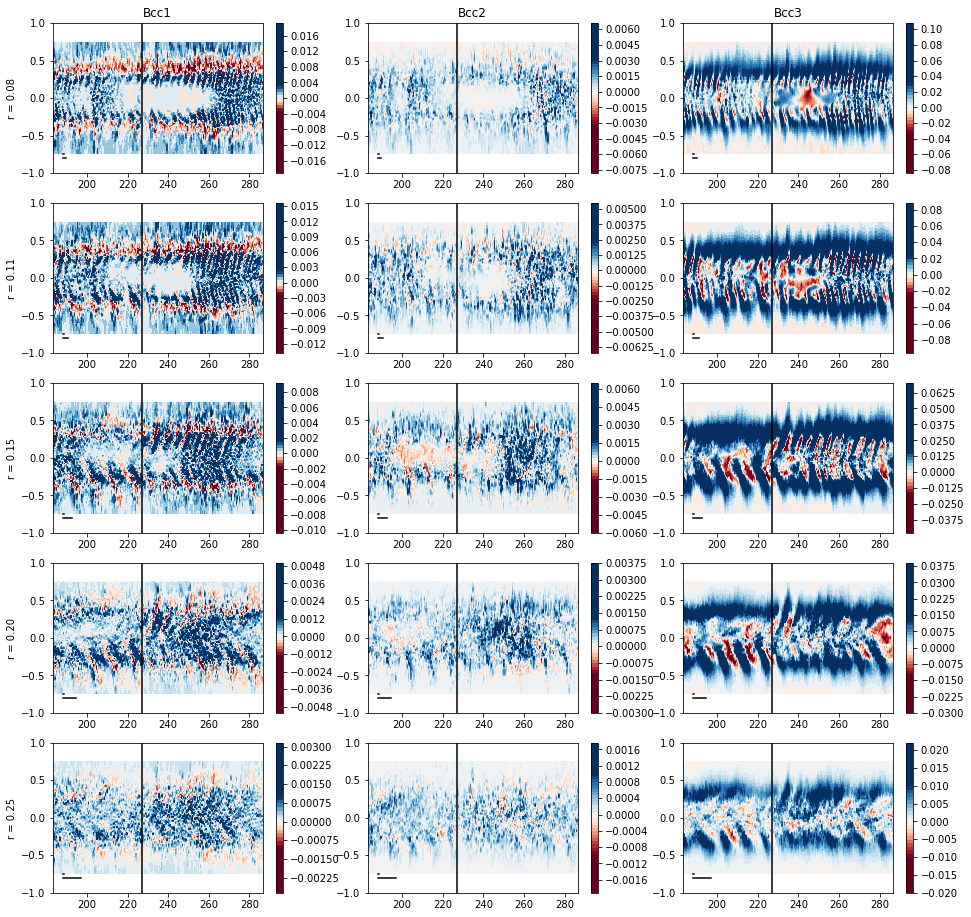

In [5]:
# butterfly diagrams

fields = ['Bcc1', 'Bcc2', 'Bcc3']
suffix = ''# '_noAvg'

if suffix == '_noAvg':
    vs = {'Bcc1':0.01, 'Bcc2':0.01, 'Bcc3':0.05}
else:
    vs = {'Bcc1':0.001, 'Bcc2':0.001, 'Bcc3':0.01}

# load and reuse
with open(dataset_pathstem + ('butterfly%s_Bcc3.pkl' % suffix), 'rb') as f:
    data = pkl.load(f)
radii = data.radii

plt.clf()
fig = plt.figure(figsize=[16,16])
gs = gridspec.GridSpec(len(radii),3)

for field_idx in range(len(fields)):
    field = fields[field_idx]
    print(field)
    
    plt.subplot(gs[0, field_idx])
    plt.title(field)

    # load and reuse
    with open(dataset_pathstem + ('butterfly%s_%s.pkl' % (suffix,field)), 'rb') as f:
        data = pkl.load(f)

    radii = data.radii

    for r_idx in range(len(radii)):
        r = radii[r_idx]

        times = list(data.val[r].keys())
        tmin, tmax = np.min(times), np.max(times)
        z_over_r = data.z_over_r

        x, y = np.meshgrid(times, z_over_r, indexing='ij')
        x = np.array(x).flatten()
        y = np.array(y).flatten()

        data_to_plot = []
        for t in times:
            data_to_plot.append(data.val[r][t])
        data_to_plot = np.array(data_to_plot).flatten()

        mask = np.invert(np.isnan(data_to_plot))
        x, y, data_to_plot = x[mask], y[mask], data_to_plot[mask]

        plt.subplot(gs[r_idx,field_idx])
        plt.tricontourf(x, y, data_to_plot, vmin=-vs[field]*(0.25/r), vmax=vs[field]*(0.25/r), cmap='RdBu', levels=50)
        plt.ylim(-1., 1.)
        plt.colorbar()

        # plot a single orbital period at the given radius
        porb_here = 2.*np.pi * np.sqrt(r**3/GM1)
        tstart = tmin + 0.05*(tmax-tmin)
        plt.plot([tstart, tstart + 10.*porb_here], [-0.8, -0.8], 'k-')
        
        # plot dt
        plt.plot([tstart, tstart + times[1]-times[0]], [-0.75, -0.75], 'k-')
        
        if field_idx == 0:
            plt.ylabel('r = %.2f' % r)
            
        plt.axvline(tstart+accretion_state_times['A'][1], color='k', ls='-')

plt.show()
plt.close()

Bcc3


/home/ppjanka/anaconda3/envs/globAcc/lib/python3.7/site-packages/ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/ppjanka/anaconda3/envs/globAcc/lib/python3.7/site-packages/ipykernel_launcher.py:230: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/ppjanka/anaconda3/envs/globAcc/lib/python3.7/site-packages/ipykernel_launcher.py:232: MatplotlibDeprecationWarning: Adding an axes using the same arguments

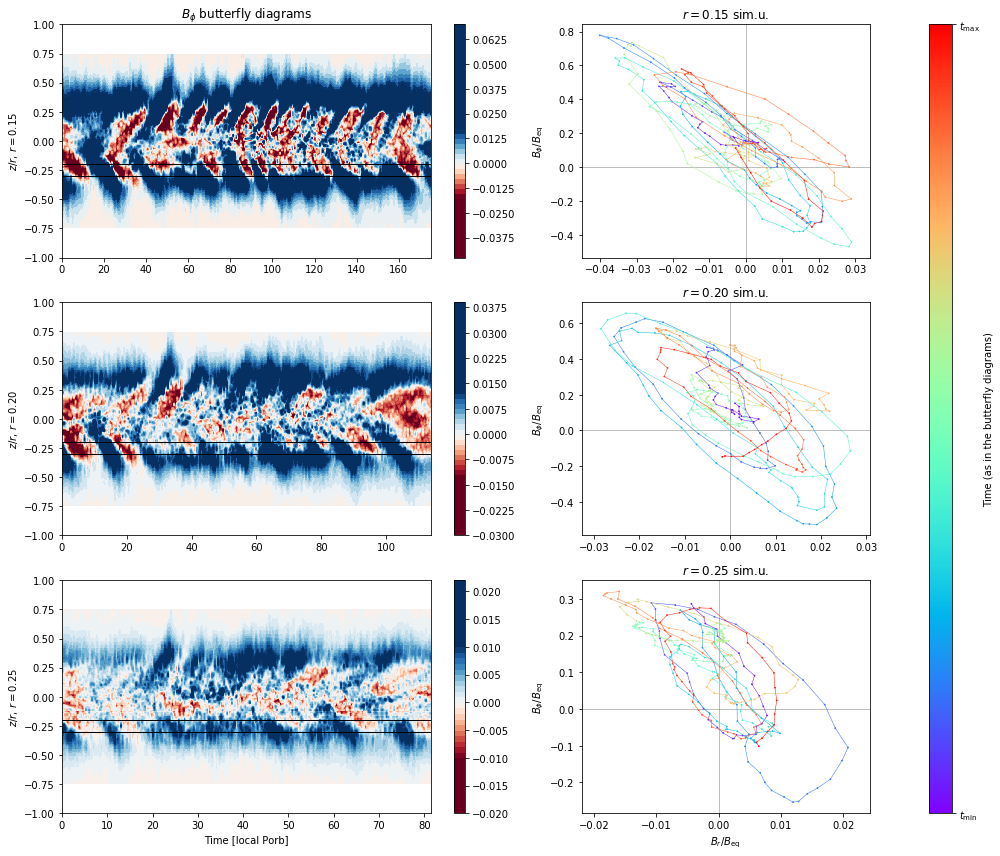

In [42]:
# Phase plots of butterfly diagrams, see. Fig. 8 of Brandenburg et al. (2008), Astronomische Nachrichten

suffix = ''
Pbutterfly_over_PorbHere = 9.
colorby = 'time'
tplot_min = tstart_steady
smoothing_box = np.ones(10)/10.
z_over_r_min = -0.3
z_over_r_max = -0.2

# plotting setup
fig = plt.figure(figsize=[14,12])
gs = gridspec.GridSpec(3, 3, width_ratios=[2.,1.25,0.1])
cmap = cm.rainbow

# BUTTERFLY DIAGRAMS -------------------------------------------

# butterfly diagrams

fields = ['Bcc3',]

if suffix == '_noAvg':
    vs = {'Bcc1':0.01, 'Bcc2':0.01, 'Bcc3':0.05}
else:
    vs = {'Bcc1':0.001, 'Bcc2':0.001, 'Bcc3':0.01}

# load and reuse
with open(dataset_pathstem + ('butterfly%s_Bcc3.pkl' % suffix), 'rb') as f:
    data = pkl.load(f)
radii = data.radii

for field_idx in range(len(fields)):
    field = fields[field_idx]
    print(field)
    
    plt.subplot(gs[0, field_idx])
    plt.title('$B_{\\phi}$ butterfly diagrams')

    # load and reuse
    with open(dataset_pathstem + ('butterfly%s_%s.pkl' % (suffix, field)), 'rb') as f:
        data = pkl.load(f)

    radii = data.radii

    for r_idx in range(len(radii))[-3:]:
        r = radii[r_idx]
        
        porb_here = 2.*np.pi * np.sqrt(r**3/GM1)

        times = list(data.val[r].keys())
        tmin, tmax = np.min(times), np.max(times)
        z_over_r = data.z_over_r

        x, y = np.meshgrid(times, z_over_r, indexing='ij')
        x = np.array(x).flatten()
        y = np.array(y).flatten()

        data_to_plot = []
        for t in times:
            data_to_plot.append(data.val[r][t])
        data_to_plot = np.array(data_to_plot).flatten()

        mask = np.invert(np.isnan(data_to_plot))
        x, y, data_to_plot = x[mask], y[mask], data_to_plot[mask]

        plt.subplot(gs[r_idx-2,0])
        plt.tricontourf((x-tstart_steady)/porb_here, y, data_to_plot, vmin=-vs[field]*(0.25/r), vmax=vs[field]*(0.25/r), cmap='RdBu', levels=50)
        plt.ylim(-1., 1.)
        plt.colorbar()
        
        plt.xlim((tplot_min-tstart_steady)/porb_here, None)

        if False:
            # plot a single orbital period at the given radius
            porb_here = 2.*np.pi * np.sqrt(r**3/GM1)
            tstart = tmin + 0.05*(tmax-tmin)
            plt.plot([tstart, tstart + 10.*porb_here], [-0.8, -0.8], 'k-')

            # plot dt
            plt.plot([tstart, tstart + times[1]-times[0]], [-0.75, -0.75], 'k-')
        
        if field_idx == 0:
            plt.ylabel('$z/r$, $r = %.2f$' % r)
            
        # plot the range used for phase plots
        plt.axhline(z_over_r_min, lw=1., color='k')
        plt.axhline(z_over_r_max, lw=1., color='k')

# PHASE PLOTS --------------------------------------------------

# read in the data, we need Br, Bphi
data = {}
for field in ['Bcc1', 'Bcc3']:
    with open(dataset_pathstem + ('butterfly%s_%s.pkl' % (suffix, field)), 'rb') as f:
        Data = pkl.load(f)

    data[field] = {}
    radii = Data.radii

    for r_idx in range(len(radii)):
        r = radii[r_idx]

        times = list(Data.val[r].keys())
        z_over_r = Data.z_over_r

        data_to_plot = []
        for t in times:
            data_to_plot.append(Data.val[r][t])
        data_to_plot = np.array(data_to_plot)

        mask = np.invert(np.isnan(data_to_plot))

        # average over z/r in [0.2,0.3] and save as (t, Bavg) array
        #mask = np.logical_or(np.tile(np.logical_or(np.abs(z_over_r) > 0.3, np.abs(z_over_r) < 0.2), [len(times), 1]), np.isnan(data_to_plot))
        mask = np.logical_or(np.tile(np.logical_or(z_over_r > z_over_r_max, z_over_r < z_over_r_min), [len(times), 1]), np.isnan(data_to_plot))
        data_to_plot = np.ma.masked_array(data_to_plot, mask=mask)
        data_to_plot = np.mean(data_to_plot, axis=1)
        
        # change time units to local Porb
        porb_here = 2.*np.pi * np.sqrt(r**3/GM1)

        # save for later
        data[field][r] = np.array([times/porb_here, data_to_plot])
        
    del Data
    
# read in the turbulent kin energy data, calc. Beq
data_beq = {}
for field in ['Turb_Ekin',]:
    with open(dataset_pathstem + ('butterfly%s_%s.pkl' % (suffix, field)), 'rb') as f:
        Data = pkl.load(f)

    data_beq[field] = {}
    radii = Data.radii

    for r_idx in range(len(radii)):
        r = radii[r_idx]

        times = list(Data.val[r].keys())
        z_over_r = Data.z_over_r

        data_to_plot = []
        for t in times:
            data_to_plot.append(Data.val[r][t])
        data_to_plot = np.array(data_to_plot)

        mask = np.invert(np.isnan(data_to_plot))
        
        # calculate Beq, Beq^2/2 = rho v^2/2
        data_to_plot = np.sqrt(2.*data_to_plot)

        # average over z/r in [0.2,0.3] and save as (t, Bavg) array
        mask = np.logical_or(np.tile(np.logical_or(z_over_r > z_over_r_max, z_over_r < z_over_r_min), [len(times), 1]), np.isnan(data_to_plot))
        data_to_plot = np.ma.masked_array(data_to_plot, mask=mask)
        data_to_plot = np.mean(data_to_plot, axis=1)
        
        # change time units to local Porb
        porb_here = 2.*np.pi * np.sqrt(r**3/GM1)

        # save for later
        data_beq[field][r] = np.array([times/porb_here, data_to_plot])
        
    del Data
        
# plot
for r_idx in range(len(radii))[-3:]:
    plt.subplot(gs[r_idx-2, 1])
    # mark B=0 lines
    plt.axhline(0., lw=0.5, color='grey')
    plt.axvline(0., lw=0.5, color='grey')
    # proceed with phase plots
    r = radii[r_idx]
    porb_here = 2.*np.pi * np.sqrt(r**3/GM1)
    # combine Bcc component arrays by time
    mask1 = np.in1d(data['Bcc1'][r][0], data['Bcc3'][r][0])
    mask3 = np.in1d(data['Bcc3'][r][0], data['Bcc1'][r][0])
    maskEk = np.in1d(data['Bcc1'][r][0][mask1], data_beq['Turb_Ekin'][r][0])
    Bcc = np.array([data['Bcc1'][r][0][mask1], data['Bcc1'][r][1][mask1], data['Bcc3'][r][1][mask3], data_beq['Turb_Ekin'][r][1][maskEk]])
    # save to csv for reference
    pd.DataFrame(Bcc.transpose()).to_csv('butterfly_phase/butterfly_phase_M%i_r%.2f.csv' % (mach_no, r), header=['Time [local Porb]', 'Bcc1_avg', 'Bcc3_avg', 'Ekin_turb'], index=None)
    idx_min = min(np.where(Bcc[0] > tplot_min)[0])
    if colorby == 'time': # color-code by time
        # smooth
        x = np.convolve(Bcc[1][idx_min:] / Bcc[3][idx_min:], smoothing_box, mode='valid')
        y = np.convolve(Bcc[2][idx_min:] / Bcc[3][idx_min:], smoothing_box, mode='valid')
        t = np.convolve(Bcc[0][idx_min:], smoothing_box, mode='valid')/porb_here
        # plot
        tmin, tmax = min(t), max(t)
        if True:
            plt.scatter(x, y, color=cmap((t-tmin)/(tmax-tmin)), s=0.5)
            # connect with multi-color lines
            for idx in range(len(t)-1):
                plt.plot([x[idx],x[idx+1]], [y[idx],y[idx+1]], color=cmap((0.5*(t[idx]+t[idx+1])-tmin)/(tmax-tmin)), linewidth=0.5)
        else:
            plt.plot(t, y)
    elif colorby=='phase': # color-code by butterfly phase
        # change time to the butterfly diagram's phase
        porb_here = 2.*np.pi * np.sqrt(r**3/GM1)
        Pbutterfly = Pbutterfly_over_PorbHere * porb_here
        phase = (Bcc[0] % Pbutterfly) / Pbutterfly
        # smooth
        x = np.convolve(Bcc[1][idx_min:] / Bcc[3][idx_min:], smoothing_box, mode='valid')
        y = np.convolve(Bcc[2][idx_min:] / Bcc[3][idx_min:], smoothing_box, mode='valid')
        t = np.convolve(phase[idx_min:], smoothing_box, mode='valid')
        # plot
        plt.scatter(x, y, color=cmap(t), s=0.5)
    if False:# suffix == '':
        if r == 0.15:
            plt.xlim(-0.0015, 0.0015)
            plt.gca().set_xticks([-0.0015, -0.00075, 0., 0.00075, 0.0015])
        elif r == 0.2:
            plt.xlim(-0.00125, 0.00125)
            plt.gca().set_xticks([-0.0015, -0.00075, 0., 0.00075, 0.0015])
        elif r == 0.25:
            plt.xlim(-0.0005, 0.0005)
            plt.gca().set_xticks([-0.0005, -0.00025, 0., 0.00025, 0.0005])
    plt.title('$r=%.2f$ sim.u.' % r)
    plt.ylabel('$B_{\\phi}/B_{\\rm eq}$')
    
# add colorbar
plt.subplot(gs[:,2])
if colorby == 'time':
    cbar = plt.colorbar(matplotlib.cm.ScalarMappable( norm=matplotlib.colors.Normalize(vmin=0, vmax=1), cmap=cmap), cax=plt.gca(), ax=plt.gca(), ticks=[0,1])
    cbar.ax.set_yticklabels(['$t_{\\rm min}$', '$t_{\\rm max}$'])
    plt.ylabel('Time (as in the butterfly diagrams)')
if colorby == 'phase':
    plt.colorbar(matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=0., vmax=1.), cmap=cmap), cax=plt.gca(), ax=plt.gca())
    plt.ylabel('Phase with P_butterfly = 10 local Porb')
    
plt.subplot(gs[2,1])
plt.xlabel('$B_r/B_{\\rm eq}$')
plt.subplot(gs[2,0])
plt.xlabel('Time [local Porb]')

plt.tight_layout()
if save:
    plt.savefig('butterfly_phase/butterfly_phase_M%i.png' % mach_no, format='png')
else:
    plt.show()
plt.close()

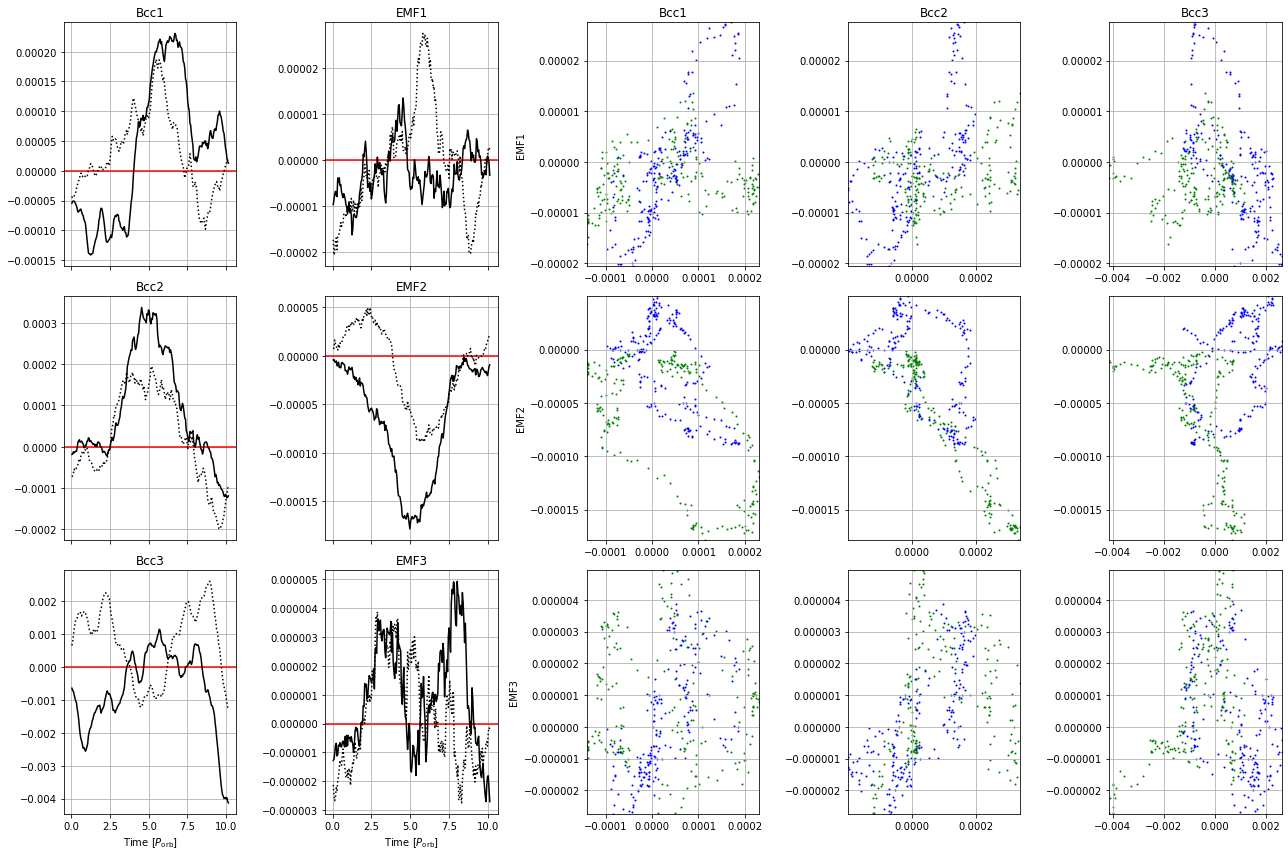

In [43]:
# Correlations between <B> and <EMF>, see Fig. 8 of Brandenburg, Nordlund & Stein (1995)

suffix = ''
r = 0.20

# plotting setup
fig = plt.figure(figsize=[18,12])
gs = gridspec.GridSpec(3,5)
cmap = cm.rainbow

smoothing_time = 1.0 * Porb
smoothing_n = int(smoothing_time / dt_snapshot)
smoothing_box = np.ones(smoothing_n)/smoothing_n

# plot the time series of <B> and <EMF>
fields = ['Bcc1', 'Bcc2', 'Bcc3', 'EMF1', 'EMF2', 'EMF3']
DATA = {}; DATA['over'] = {}; DATA['under'] = {}
for i in range(6):
    
    # load the data
    field = fields[i]
    with open(dataset_pathstem + ('butterfly%s_%s.pkl' % (suffix, field)), 'rb') as f:
        Data = pkl.load(f)
    z_over_r = np.array(Data.z_over_r)
    Data = Data.val[r]
    times = np.array(list(Data.keys()))
    
    # split into over and under the midplane, average
    DATA['under'][field] = []; DATA['over'][field] = []
    for t in times:
        DATA['under'][field].append(np.nanmean(Data[t][(z_over_r < 0.) & (z_over_r > (-1./mach_no))]))
        DATA['over'][field].append(np.nanmean(Data[t][(z_over_r > 0.) & (z_over_r < (1./mach_no))]))
    if True: # boxcar-average
        DATA['under'][field] = np.convolve(np.array( DATA['under'][field]), smoothing_box, mode='valid')
        DATA['over'][field] = np.convolve(np.array(DATA['over'][field]), smoothing_box, mode='valid')
        times = np.convolve(times, smoothing_box, mode='valid')
    else: # bin
        times_binned = []; under_binned = []; over_binned = []
        idx = 0
        while idx < len(times):
            times_binned.append(np.mean(times[idx:(idx+smoothing_n)]))
            under_binned.append(np.mean(DATA['under'][field][idx:(idx+smoothing_n)]))
            over_binned.append(np.mean(DATA['over'][field][idx:(idx+smoothing_n)]))
            idx += smoothing_n
        times = np.array(times_binned)
        DATA['under'][field] = np.array(under_binned)
        DATA['over'][field] = np.array(over_binned)
    
    # limit to the time range from the paper
    mask_time = ((times-tstart_steady) < 0.)
    not_mask_time = ((times-tstart_steady) > 0.)
    
    # plot
    plt.subplot(gs[(i%3),int(i/3)])
    plt.axhline(0., color='r')
    plt.plot(((times-tstart_steady)/Porb)[not_mask_time], DATA['over'][field][not_mask_time], 'k-')
    plt.plot(((times-tstart_steady)/Porb)[not_mask_time], DATA['under'][field][not_mask_time], 'k:')
    plt.title(field)
    if i%3 == 2:
        plt.xlabel('Time [$P_{\\rm orb}$]')
    else:
        plt.gca().set_xticklabels([])
    plt.grid()
    
# plot the correlation diagrams
bfields = ['Bcc1', 'Bcc2', 'Bcc3']
emfs = ['EMF1', 'EMF2', 'EMF3']
for i in range(3):
    for j in range(3):
        plt.subplot(gs[i,j+2])
        # produce the scatter plots and scale them
        mask = np.invert(np.isnan(DATA['over'][bfields[j]]) | np.isnan(DATA['over'][emfs[i]]) | mask_time)
        plt.scatter(DATA['over'][bfields[j]][mask], DATA['over'][emfs[i]][mask], color='g', s=1)
        plt.ylim(min(np.min(DATA['under'][emfs[i]][mask]), np.min(DATA['over'][emfs[i]][mask])), max(np.max(DATA['under'][emfs[i]][mask]), np.max(DATA['over'][emfs[i]][mask])))
        mask = np.invert(np.isnan(DATA['under'][bfields[j]]) | np.isnan(DATA['under'][emfs[i]]) | mask_time)
        plt.scatter(DATA['under'][bfields[j]][mask], DATA['under'][emfs[i]][mask], color='b', s=1)
        plt.xlim(min(np.min(DATA['under'][bfields[j]][mask]), np.min(DATA['over'][bfields[j]][mask])), max(np.max(DATA['under'][bfields[j]][mask]), np.max(DATA['over'][bfields[j]][mask])))
        if i == 0:
            plt.title(bfields[j])
        if j == 0:
            plt.ylabel(emfs[i])
        plt.grid()
        
plt.tight_layout()
if save:
    plt.savefig('butterfly_phase/EMFvsB_M%i.png' % mach_no, format='png')
else:
    plt.show()
plt.close()

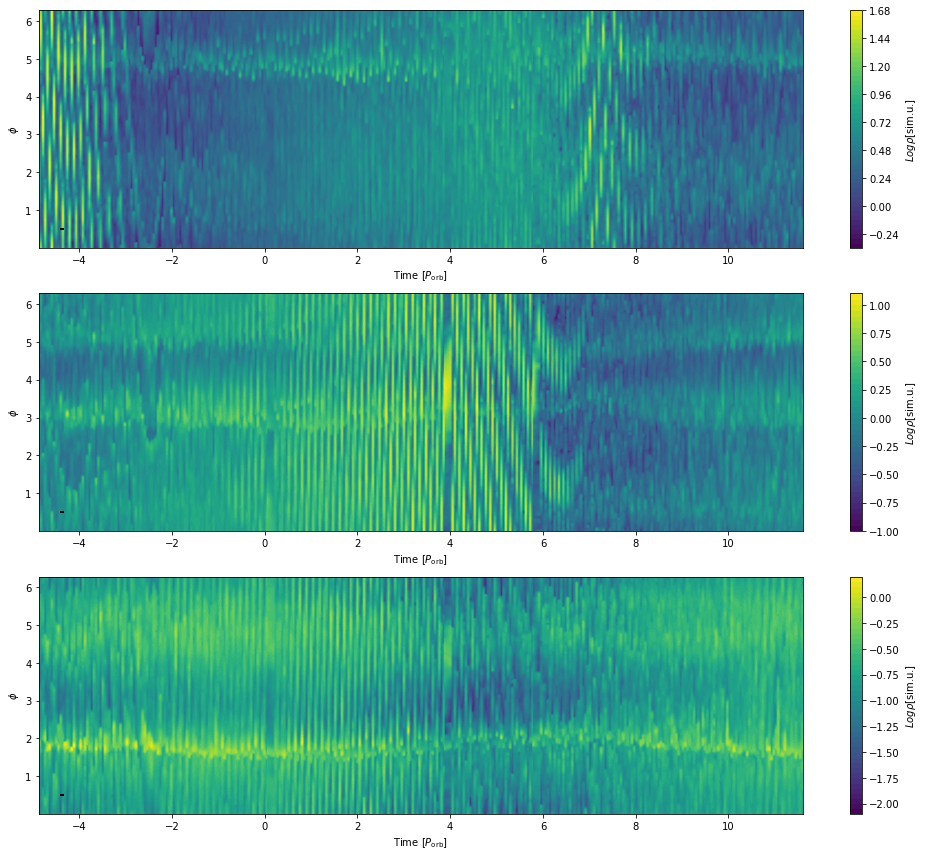

In [44]:
# pattern speed plots: Br (rho) vs phi vs time, see Warnecke (2018), Fig. 13

with open(dataset_pathstem + 'patternSpeed_rho.pkl', 'rb') as f:
    data = pkl.load(f)
    
radii_to_plot = [0.15, 0.2, 0.25]
    
# plotting setup
fig = plt.figure(figsize=[14,12])
gs = gridspec.GridSpec(3,1)
    
for i in range(len(radii_to_plot)):
    
    r = radii_to_plot[i]
    plt.subplot(gs[i,0])
    
    vals = np.array([data.val[r][t] for t in data.times])
    
    plt.contourf((np.array(data.times)-tstart_steady)/Porb, np.array(data.phis), np.log(vals).transpose(), 50)
    
    cbar = plt.colorbar()
    cbar.ax.set_ylabel('$Log \\rho $[sim.u.]')
    
    plt.plot([(data.times[0]+3-tstart_steady)/Porb, (data.times[1]+3-tstart_steady)/Porb], [0.5,0.5], 'k-', linewidth=2)
    
    plt.xlabel('Time [$P_{\\rm orb}$]')
    plt.ylabel('$\\phi$')

plt.tight_layout()
if save:
    plt.savefig('butterfly_phase/patternSpeed_M%i.png' % mach_no, format='png')
else:
    plt.show()
plt.close()

In [14]:
Porb/np.sqrt(GM/0.2)

3.203808448882819

In [ ]:
# calculate beta averages for the paper

def plot(mask):
    plt.clf()
    fig = plt.figure(figsize=(12,5))
    plt.subplot(131)
    plt.title('Beta')
    plt.hist(np.log10(data3D_press.val[mask] / data3D_pmag.val[mask]), bins=20)
    plt.subplot(132)
    plt.title('Press')
    plt.hist(np.log10(data3D_press.val[mask]), bins=20)
    plt.subplot(133)
    plt.title('Pmag')
    plt.hist(np.log10(data3D_pmag.val[mask]), bins=20)
    plt.show()
    plt.close()

with open(dataset_pathstem + 'steady_Pmag3D.pkl', 'rb') as f:
    data3D_pmag = pkl.load(f)
with open(dataset_pathstem + 'steady_press3D.pkl', 'rb') as f:
    data3D_press = pkl.load(f)
with open(dataset_pathstem + 'steady_rho3D.pkl', 'rb') as f:
    data3D_rho = pkl.load(f)
with open(dataset_pathstem + 'steady_csound3D.pkl', 'rb') as f:
    data3D_csound = pkl.load(f)

phi, theta, r = data3D_pmag.phi, data3D_pmag.theta, data3D_pmag.r
phi, theta, r = np.meshgrid(phi, theta, r, indexing='ij')

# main disk
mask = (np.abs(0.5*np.pi-theta) < 2. / mach_no) & (r < 0.3)
beta = np.mean(data3D_press.val[mask]) / np.mean(data3D_pmag.val[mask])
csound_main = np.mean(np.sqrt(data3D_press.val[mask]/data3D_rho.val[mask]))
plot(mask)
plot(mask)
print('Average main-disk beta: %.2f' % beta)
print('Average main-disk csound: %.2f' % csound_main)
mask_main = mask

In [ ]:
# inflow
dxi = np.sqrt((0.5*np.pi-theta)**2 + np.where(phi < np.pi, phi, 2.*np.pi-phi)**2)
mask = (dxi < 0.1 * 5./mach_no) & (r > (data3D_press.r[-1]-1.0e-10))
beta = np.mean(data3D_press.val[mask]) / np.mean(data3D_pmag.val[mask])
#csound_infl = np.mean(data3D_csound.val[mask])
csound_infl = np.mean(np.sqrt(data3D_press.val[mask]/data3D_rho.val[mask]))
plot(mask)
print('Average inflow beta: %.2f' % beta)
print('Average inflow csound: %.2f' % csound_infl)
print('Average inflow beta corrected for csound: %.2f' % (beta*(csound_main/csound_infl)**2))
print('Average inflow beta corrected for gas pressure: %.2f' % (np.mean(data3D_press.val[mask_main]) / np.mean(data3D_pmag.val[mask])))

In [ ]:
print(np.sqrt(GM1/0.05)/mach_no)
print((0.3/0.05)**(-3./8.)*np.sqrt(GM1/0.05)/mach_no)
print((0.62/0.05)**(-3./8.)*np.sqrt(GM1/0.05)/mach_no)

In [ ]:
print('Average inflow beta corrected for csound: %.2f' % (beta*(csound_main/0.15)**2))

In [ ]:
print(np.mean(np.sqrt(data3D_press.val[mask]/data3D_rho.val[mask])))

In [ ]:
beta = (np.mean(data3D_press.val[mask]*data3D_rho.val[mask]) / np.mean(data3D_pmag.val[mask]*data3D_rho.val[mask]))
print('Average inflow beta weighted by rho: %.2f' %beta)
print('Average inflow beta corrected for csound: %.2f' % (beta*(csound_main/csound_infl)**2))

In [6]:
# plot Bmag vs rho histogram to see whether the inflow influences bfield
from athena_read import athdf

data = athdf(snapshot_path)

r, theta, phi = data['x1v'], data['x2v'], data['x3v']
rm, tm, pm = np.meshgrid(r, theta, phi, indexing='ij')
dr = r[1:] - r[:-1]
dtheta = theta[1:] - theta[:-1]
dphi = phi[1:] - phi[:-1]
drm, dtm, dpm = np.meshgrid(dr, dtheta, dphi, indexing='ij')
ravg = 0.5 * (r[1:] + r[:-1])
tavg = 0.5 * (theta[1:] + theta[:-1])
pavg = 0.5 * (phi[1:] + phi[:-1])
ravgm, tavgm, pavgm = np.meshgrid(ravg, tavg, pavg, indexing='ij')
dV = ravgm**2 * np.sin(tavgm) * drm*dtm*dpm
del drm, dtm, dpm

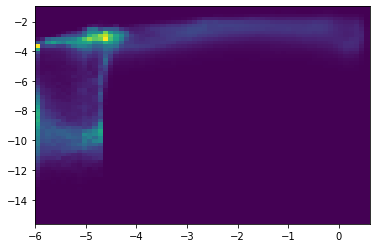

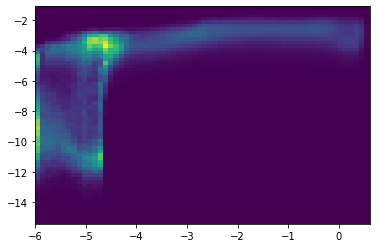

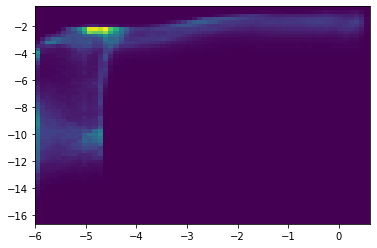

In [7]:
_ = plt.hist2d(np.log10(data['rho']).flatten(), np.log10(np.abs(data['Bcc1'])).flatten(), bins=64)
plt.show()

_ = plt.hist2d(np.log10(data['rho']).flatten(), np.log10(np.abs(data['Bcc2'])).flatten(), bins=64)
plt.show()

_ = plt.hist2d(np.log10(data['rho']).flatten(), np.log10(np.abs(data['Bcc3'])).flatten(), bins=64)
plt.show()

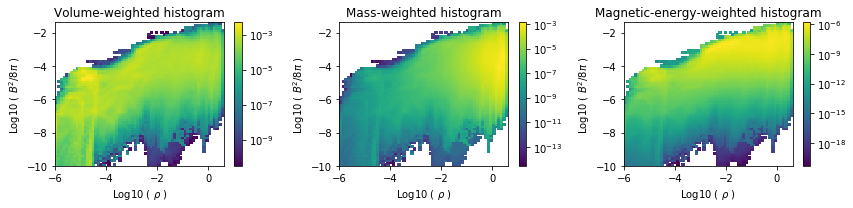

In [17]:
from scipy.ndimage.filters import convolve
from matplotlib.colors import LogNorm

Eb_dV = 0.5*(data['Bcc1']**2 + data['Bcc2']**2 + data['Bcc3']**2)
Eb_dV = convolve(Eb_dV, np.ones([2,2,2]) * (0.5**3), mode='constant', cval=np.nan)[:-1,:-1,:-1]
rhoavg = convolve(data['rho'], np.ones([2,2,2]) * (0.5**3), mode='constant', cval=np.nan)[:-1,:-1,:-1]

Ebmin = 1.0e-10
mask = np.where(Eb_dV.flatten() > Ebmin)[0]

# plot

plt.figure(figsize=(12,3))
gs = gridspec.GridSpec(1,3)

plt.subplot(gs[0,0])
_ = plt.hist2d(np.log10(rhoavg).flatten()[mask], np.log10(Eb_dV).flatten()[mask], bins=64, weights=dV.flatten()[mask], norm=LogNorm())
plt.colorbar()
plt.xlabel('Log10 ( $\\rho$ )')
plt.ylabel('Log10 ( $B^2/8\\pi$ )')
plt.ylim(np.log10(Ebmin),None)
plt.title('Volume-weighted histogram')

plt.subplot(gs[0,1])
_ = plt.hist2d(np.log10(rhoavg).flatten()[mask], np.log10(Eb_dV).flatten()[mask], bins=64, weights=(rhoavg*dV).flatten()[mask], norm=LogNorm())
plt.colorbar()
plt.xlabel('Log10 ( $\\rho$ )')
plt.ylabel('Log10 ( $B^2/8\\pi$ )')
plt.ylim(np.log10(Ebmin),None)
plt.title('Mass-weighted histogram')

plt.subplot(gs[0,2])
_ = plt.hist2d(np.log10(rhoavg).flatten()[mask], np.log10(Eb_dV).flatten()[mask], bins=64, weights=(Eb_dV*dV).flatten()[mask], norm=LogNorm())
plt.colorbar()
plt.xlabel('Log10 ( $\\rho$ )')
plt.ylabel('Log10 ( $B^2/8\\pi$ )')
plt.ylim(np.log10(Ebmin),None)
plt.title('Magnetic-energy-weighted histogram')

plt.tight_layout()
if save:
    plt.savefig('M%i_BvsRho_rev1.png' % mach_no, format='png')
else:
    plt.show()
plt.close()